In [2]:
pip install pysm3

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np

In [4]:
%matplotlib inline

import numpy as np
import pylab as plt

In [5]:
!pip3 install pygdsm
!pip3 install pygdsm

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import ephem
from scipy.signal import correlate

from scipy.optimize import curve_fit

%matplotlib inline
from pygdsm import GlobalSkyModel


from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

import pandas as pd
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator

In [6]:
start_time_in_UTC = '2012-05-19 05:45:00'
n_spectra = 1                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2012-05-19 05:45:00.000']


In [7]:
import glob
import os
import numpy as np
from scipy import interpolate

'''
## In the rt_file, mention the filename of S11. Please check if it is in linear form. 

rt_file    = 'dipole_correct.txt'
file_list  = sorted(glob.glob(os.path.join(beam_path,"*farfield*.txt")))
#print(file_list)



gamme_file = os.path.join(beam_path, rt_file)

gamma_freq = []
gamma_val  = []

with open(gamme_file) as fa:
    for line_aa in fa.readlines()[2:]:
        line_aa = line_aa.strip()
        col1    = line_aa.split('\t')
        _freq   = np.array(list(map(float, col1[0].split())))[0]
        _val    = np.array(list(map(float, col1[1].split())))[0]
        gamma_freq.append(_freq)
        gamma_val.append(_val)
        
gamma_freq = np.array(gamma_freq)
gamma_val  = np.array(gamma_val)
gamma_val=10**(gamma_val/20)

print(gamma_freq)
print(gamma_val)
gamma_func = interpolate.interp1d(gamma_freq, gamma_val)  '''


## This below print statement is to verify our interpolation. print(gamma_func(any freq value)) 
## and check if it matches the value in the file
#print(gamma_func(2.8))


## The below code is for the beam definition. Please make sure to check the beam_def function before proceeding

'''
phi_res   = 1
theta_res = 1

phi_array   = np.arange(0, 360, phi_res)
theta_array = np.arange(90, -90-theta_res, -theta_res) 
freq_array  = []
file_array  = []

def get_freq_from_file(filename):
    _temp = os.path.basename(filename).replace('.txt','').replace('farfield','').replace('(f=','').replace(')','').replace('[1]','')
    return float(_temp)
    
for ii, file_add in enumerate(file_list):
    freq_array.append(get_freq_from_file(file_add))
    file_array.append(file_add)
    
print(get_freq_from_file('farfield(f=2.608)[1].txt'))
    
np.testing.assert_array_equal(file_array, file_list)

freq_array = np.array(freq_array)
file_array = np.array(file_array)

isort      = np.argsort(freq_array)
freq_array = freq_array[isort]
file_array = file_array[isort]

beam_3D_unnorm = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

'''
'''
for ii, freq in enumerate(freq_array):
    print("Processing frequency {} GHz".format(freq))
    file_add = file_array[ii]
    with open(file_add) as fa:
        for line_aa in fa.readlines()[2:]:
            line_aa = line_aa.strip()
            col1    = line_aa.split('\t')
            all_val = np.array(list(map(float, col1[0].split())))

            theta   = 90-all_val[0] 
            phi     = all_val[1]
            beam    = all_val[2]
            print(theta)
            

            iphi    = np.where(phi_array==phi)[0][0]
            itheta  = np.where(theta_array==theta)[0][0]
            beam_3D_unnorm[ii, itheta, iphi] = 10**(beam/10)
            


beam_3D = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

print(beam_3D_unnorm[0, :,:].shape)


for ifreq in range(beam_3D.shape[0]):
    for itheta in range(beam_3D.shape[1]):
        for iphi in range(beam_3D.shape[2]):
            beam_3D[ifreq, itheta,iphi] = beam_3D_unnorm[ifreq, itheta,iphi]/np.amax(beam_3D_unnorm[ifreq,:,:])


print(freq_array)    

        
theta_array_new = np.flip(theta_array)
phi_array_new   = phi_array
beam_3D_flip=np.flip(beam_3D,axis=1)
print(beam_3D_flip[2,:,0],beam_3D[2,:,0])
from scipy.interpolate import RegularGridInterpolator
my_interpolating_function = RegularGridInterpolator((freq_array, theta_array_new,
                                                     phi_array_new), beam_3D_flip)
print(my_interpolating_function.shape)

'''

## Beam definition
## If only the effect of S11 has to be checked (with ideal antenna beam), use the sin^(theta) beam. 

## Added

#freq = [408, 1420, 23000]
#phi_res   = 1
#theta_res = 1

#az   = np.arange(0, 360, phi_res)
#alt = np.arange(90, -90-theta_res, -theta_res) 

## Added ends

def beam_def(freq, alt, az):
    if (alt<=0):
        return 0
    else:
        return (math.cos(alt*PI/180)*math.sin(alt*PI/180))


    
#plt.plot(gamma_freq, gamma_val)
#plt.xlim([2,4])
#plt.show()

In [8]:
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2                #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 6
No_of_Channels = 252
Channel_width = 1
#N_SIDE = 64
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins
Time_in_UTC = ts
latitude = 13.067439
longitude =80.237617            #Latitude and longitude in degrees
altitude = 0                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter)
PI = 3.14159265
Noise_int_time = 3e+13
Trx = 14
T_atm = 1
frequencies = np.linspace(f_start,f_stop, No_of_Channels, endpoint=True)
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)
cross_real = [0]*No_of_Channels
cross_imag = [0]*No_of_Channels
sumwt = [0]*No_of_Channels
sigma = [0]*No_of_Channels
spectra = [0]*n_spectra
spectra_cross_imag = [0]*n_spectra

cross_mix = [0]*No_of_Channels
spectra_real = [0] * n_spectra
spectra_imag = [0] * n_spectra
sigma_real = [0]*No_of_Channels
sigma_imag = [0]*No_of_Channels

#NPIX = hp.nside2npix(N_SIDE)

#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R



Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print(lst)
#plt.xlabel('Altitutde')
#plt.ylabel('Gain')
#plt.plot(alt[1:180],beam_3D_flip[50,1:180,0]) 
print(beam_def(2.8,-70,0))
print (frequencies)
#print(NPIX)
#plt.plot(beam_3D[100,1:90,0])

# Frequencies between 2600 and 4000
filtered_indices = np.where((frequencies >= 2.6) & (frequencies <= 4))[0]
filtered_frequencies = frequencies[filtered_indices]

print("Filtered frequencies:", filtered_frequencies)
print("Indices of filtered frequencies:", filtered_indices)


[2h55m09.67251165s]
0
[2.         2.01593625 2.03187251 2.04780876 2.06374502 2.07968127
 2.09561753 2.11155378 2.12749004 2.14342629 2.15936255 2.1752988
 2.19123506 2.20717131 2.22310757 2.23904382 2.25498008 2.27091633
 2.28685259 2.30278884 2.3187251  2.33466135 2.35059761 2.36653386
 2.38247012 2.39840637 2.41434263 2.43027888 2.44621514 2.46215139
 2.47808765 2.4940239  2.50996016 2.52589641 2.54183267 2.55776892
 2.57370518 2.58964143 2.60557769 2.62151394 2.6374502  2.65338645
 2.66932271 2.68525896 2.70119522 2.71713147 2.73306773 2.74900398
 2.76494024 2.78087649 2.79681275 2.812749   2.82868526 2.84462151
 2.86055777 2.87649402 2.89243028 2.90836653 2.92430279 2.94023904
 2.9561753  2.97211155 2.98804781 3.00398406 3.01992032 3.03585657
 3.05179283 3.06772908 3.08366534 3.09960159 3.11553785 3.1314741
 3.14741036 3.16334661 3.17928287 3.19521912 3.21115538 3.22709163
 3.24302789 3.25896414 3.2749004  3.29083665 3.30677291 3.32270916
 3.33864542 3.35458167 3.37051793 3.386454

In [9]:
#recomb_path = "."
recomb_path = "/Users/hshishir/Desktop/Theory"

/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_70532/1231915834.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(recomb_file,sep= "    " ,header = None)


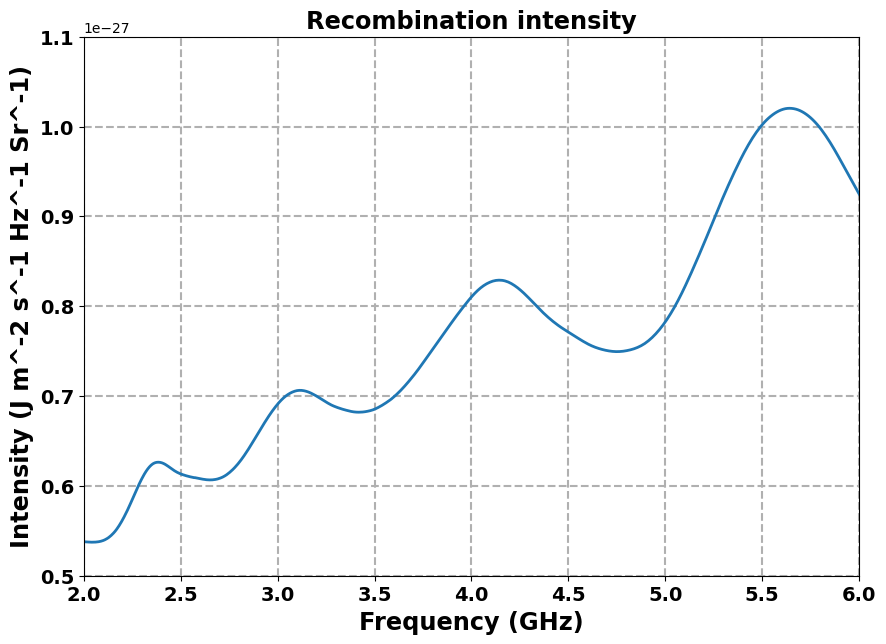

In [10]:
recomb_file = os.path.join(recomb_path,'total_spec_new.txt')
df = pd.read_csv(recomb_file,sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.figure(figsize=(10, 7))
plt.plot((df['Frequency']), (df['Intensity']),linewidth=2)
plt.title('Recombination intensity', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
plt.xlim([2,6])
plt.ylim([0.5e-27,1.1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

ius = InterpolatedUnivariateSpline(x, y)
Rec_int = ius(frequencies)

In [11]:
from scipy.interpolate import interp1d

x_new = np.linspace(2, 6, 252)

f = interp1d(x, y, kind='linear', fill_value='extrapolate')
y_new = f(x_new)

output_file = os.path.join(recomb_path, 'interpolated_values.txt')
with open(output_file, 'w') as f:
    for freq, inten in zip(x_new, y_new):
        f.write(f"{freq}\t{inten}\n")

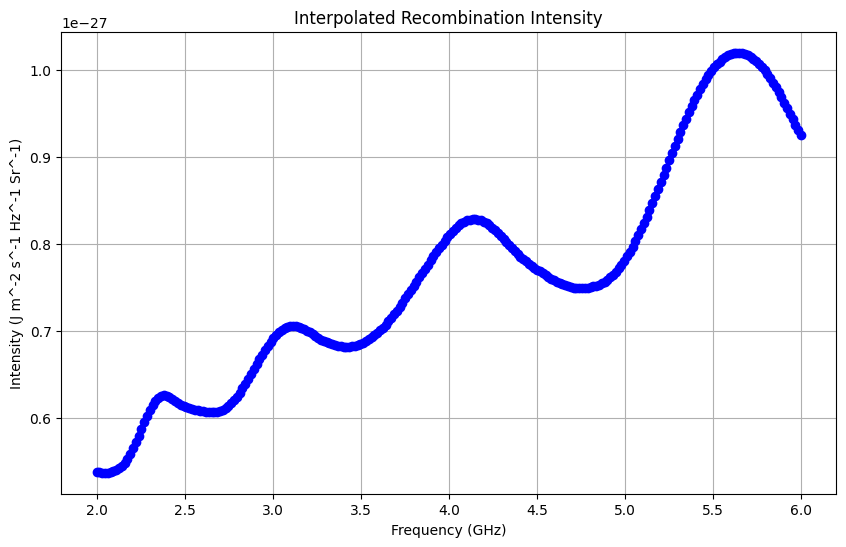

In [12]:
file_path = '/Users/hshishir/Desktop/Theory/interpolated_values.txt'

recomb_li = pd.read_csv(file_path, delimiter='\t', header=None)

x = recomb_li[0]
y = recomb_li[1]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.title('Interpolated Recombination Intensity')
plt.grid(True)
plt.show()


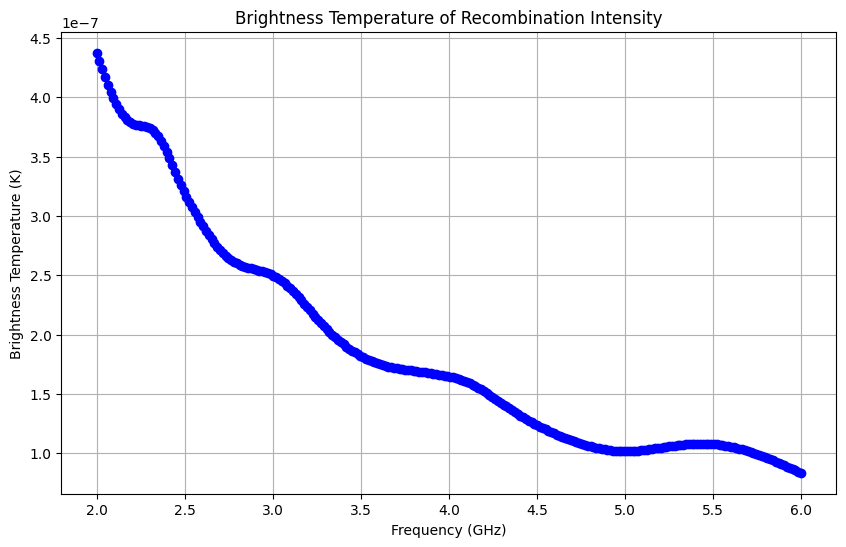

1.6507890944710502e-07


In [13]:
file_path = '/Users/hshishir/Desktop/Theory/interpolated_values.txt'
output_file_path = '/Users/hshishir/Desktop/Theory/brightness_temperature.txt'

recomb_li = pd.read_csv(file_path, delimiter='\t', header=None)

frequencies1 = recomb_li[0]
intensities1 = recomb_li[1]

brightness_temps = []

for j in range(252):
    brightness_temp_recomb = (intensities1[j] * (c**2)) / (2 * k * 1e+18 * (frequencies1[j] ** 2))
    brightness_temps.append((frequencies1[j], brightness_temp_recomb))

with open(output_file_path, 'w') as file:
    for freq, temp in brightness_temps:
        file.write(f"{freq}\t{temp}\n")

brightness_temp_data = pd.read_csv(output_file_path, delimiter='\t', header=None)
frequencies_bt = brightness_temp_data[0]
brightness_temps_bt = brightness_temp_data[1]

plt.figure(figsize=(10, 6))
plt.plot(frequencies_bt, brightness_temps_bt, marker='o', linestyle='-', color='b')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.title('Brightness Temperature of Recombination Intensity')
plt.grid(True)
plt.show()

print(brightness_temps_bt[125])

In [14]:
from pygdsm import GlobalSkyModel16
from pygdsm import GlobalSkyModel

In [15]:
CMB_Int = ((2*h*1e+27*frequencies**3)/(c*c))/(np.exp((h*frequencies*1e+9)/(k*TCMB))-1)
print("Got CMB Int!")

#P_hot and P_cold for calibration
P_hot = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_hot))-1)
P_cold = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold

# Output the results for verification
print("CMB_Int:", CMB_Int)
print("P_hot:", P_hot)
print("P_cold:", P_cold)
print("P_dif:", P_dif)

print("Got P_dif for calibration!")

Got CMB Int!
CMB_Int: [3.29082623e-21 3.34300676e-21 3.39559023e-21 3.44857647e-21
 3.50196531e-21 3.55575656e-21 3.60995006e-21 3.66454562e-21
 3.71954308e-21 3.77494226e-21 3.83074298e-21 3.88694507e-21
 3.94354836e-21 4.00055267e-21 4.05795783e-21 4.11576366e-21
 4.17396999e-21 4.23257664e-21 4.29158345e-21 4.35099023e-21
 4.41079681e-21 4.47100301e-21 4.53160867e-21 4.59261361e-21
 4.65401766e-21 4.71582063e-21 4.77802236e-21 4.84062268e-21
 4.90362140e-21 4.96701836e-21 5.03081338e-21 5.09500629e-21
 5.15959691e-21 5.22458507e-21 5.28997059e-21 5.35575331e-21
 5.42193305e-21 5.48850963e-21 5.55548289e-21 5.62285264e-21
 5.69061871e-21 5.75878094e-21 5.82733914e-21 5.89629315e-21
 5.96564279e-21 6.03538788e-21 6.10552826e-21 6.17606375e-21
 6.24699418e-21 6.31831937e-21 6.39003915e-21 6.46215335e-21
 6.53466179e-21 6.60756430e-21 6.68086072e-21 6.75455085e-21
 6.82863454e-21 6.90311161e-21 6.97798189e-21 7.05324520e-21
 7.12890137e-21 7.20495023e-21 7.28139160e-21 7.35822531e-21
 7

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
sky = pysm3.Sky(nside=32, preset_strings=["s1"])

In [18]:
sky.components

In [18]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/I2/fits_file(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I2/maps_tx(32)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_0 = map_2GHz[0]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_0, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


Processing 2.0 GHz...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.0 GHz.
Processing 2.0159362549800797 GHz...
Completed 2.0159362549800797 GHz.
Processing 2.0318725099601593 GHz...
Completed 2.0318725099601593 GHz.
Processing 2.047808764940239 GHz...
Completed 2.047808764940239 GHz.
Processing 2.0637450199203187 GHz...
Completed 2.0637450199203187 GHz.
Processing 2.0796812749003983 GHz...
Completed 2.0796812749003983 GHz.
Processing 2.095617529880478 GHz...
Completed 2.095617529880478 GHz.
Processing 2.1115537848605577 GHz...
Completed 2.1115537848605577 GHz.
Processing 2.1274900398406373 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.1274900398406373 GHz.
Processing 2.143426294820717 GHz...
Completed 2.143426294820717 GHz.
Processing 2.1593625498007967 GHz...
Completed 2.1593625498007967 GHz.
Processing 2.1752988047808763 GHz...
Completed 2.1752988047808763 GHz.
Processing 2.191235059760956 GHz...
Completed 2.191235059760956 GHz.
Processing 2.2071713147410357 GHz...
Completed 2.2071713147410357 GHz.
Processing 2.2231075697211153 GHz...
Completed 2.2231075697211153 GHz.
Processing 2.239043824701195 GHz...
Completed 2.239043824701195 GHz.
Processing 2.2549800796812747 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.2549800796812747 GHz.
Processing 2.2709163346613543 GHz...
Completed 2.2709163346613543 GHz.
Processing 2.286852589641434 GHz...
Completed 2.286852589641434 GHz.
Processing 2.302788844621514 GHz...
Completed 2.302788844621514 GHz.
Processing 2.318725099601594 GHz...
Completed 2.318725099601594 GHz.
Processing 2.3346613545816735 GHz...
Completed 2.3346613545816735 GHz.
Processing 2.350597609561753 GHz...
Completed 2.350597609561753 GHz.
Processing 2.366533864541833 GHz...
Completed 2.366533864541833 GHz.
Processing 2.3824701195219125 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.3824701195219125 GHz.
Processing 2.398406374501992 GHz...
Completed 2.398406374501992 GHz.
Processing 2.414342629482072 GHz...
Completed 2.414342629482072 GHz.
Processing 2.4302788844621515 GHz...
Completed 2.4302788844621515 GHz.
Processing 2.446215139442231 GHz...
Completed 2.446215139442231 GHz.
Processing 2.462151394422311 GHz...
Completed 2.462151394422311 GHz.
Processing 2.4780876494023905 GHz...
Completed 2.4780876494023905 GHz.
Processing 2.49402390438247 GHz...
Completed 2.49402390438247 GHz.
Processing 2.50996015936255 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.50996015936255 GHz.
Processing 2.5258964143426295 GHz...
Completed 2.5258964143426295 GHz.
Processing 2.541832669322709 GHz...
Completed 2.541832669322709 GHz.
Processing 2.557768924302789 GHz...
Completed 2.557768924302789 GHz.
Processing 2.5737051792828685 GHz...
Completed 2.5737051792828685 GHz.
Processing 2.589641434262948 GHz...
Completed 2.589641434262948 GHz.
Processing 2.605577689243028 GHz...
Completed 2.605577689243028 GHz.
Processing 2.6215139442231075 GHz...
Completed 2.6215139442231075 GHz.
Processing 2.637450199203187 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.637450199203187 GHz.
Processing 2.653386454183267 GHz...
Completed 2.653386454183267 GHz.
Processing 2.6693227091633465 GHz...
Completed 2.6693227091633465 GHz.
Processing 2.685258964143426 GHz...
Completed 2.685258964143426 GHz.
Processing 2.7011952191235062 GHz...
Completed 2.7011952191235062 GHz.
Processing 2.717131474103586 GHz...
Completed 2.717131474103586 GHz.
Processing 2.7330677290836656 GHz...
Completed 2.7330677290836656 GHz.
Processing 2.7490039840637452 GHz...
Completed 2.7490039840637452 GHz.
Processing 2.764940239043825 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.764940239043825 GHz.
Processing 2.7808764940239046 GHz...
Completed 2.7808764940239046 GHz.
Processing 2.7968127490039842 GHz...
Completed 2.7968127490039842 GHz.
Processing 2.812749003984064 GHz...
Completed 2.812749003984064 GHz.
Processing 2.8286852589641436 GHz...
Completed 2.8286852589641436 GHz.
Processing 2.8446215139442232 GHz...
Completed 2.8446215139442232 GHz.
Processing 2.860557768924303 GHz...
Completed 2.860557768924303 GHz.
Processing 2.8764940239043826 GHz...
Completed 2.8764940239043826 GHz.
Processing 2.8924302788844622 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.8924302788844622 GHz.
Processing 2.908366533864542 GHz...
Completed 2.908366533864542 GHz.
Processing 2.9243027888446216 GHz...
Completed 2.9243027888446216 GHz.
Processing 2.9402390438247012 GHz...
Completed 2.9402390438247012 GHz.
Processing 2.956175298804781 GHz...
Completed 2.956175298804781 GHz.
Processing 2.9721115537848606 GHz...
Completed 2.9721115537848606 GHz.
Processing 2.9880478087649402 GHz...
Completed 2.9880478087649402 GHz.
Processing 3.00398406374502 GHz...
Completed 3.00398406374502 GHz.
Processing 3.0199203187250996 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.0199203187250996 GHz.
Processing 3.0358565737051793 GHz...
Completed 3.0358565737051793 GHz.
Processing 3.051792828685259 GHz...
Completed 3.051792828685259 GHz.
Processing 3.0677290836653386 GHz...
Completed 3.0677290836653386 GHz.
Processing 3.0836653386454183 GHz...
Completed 3.0836653386454183 GHz.
Processing 3.099601593625498 GHz...
Completed 3.099601593625498 GHz.
Processing 3.1155378486055776 GHz...
Completed 3.1155378486055776 GHz.
Processing 3.1314741035856573 GHz...
Completed 3.1314741035856573 GHz.
Processing 3.147410358565737 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.147410358565737 GHz.
Processing 3.1633466135458166 GHz...
Completed 3.1633466135458166 GHz.
Processing 3.1792828685258963 GHz...
Completed 3.1792828685258963 GHz.
Processing 3.195219123505976 GHz...
Completed 3.195219123505976 GHz.
Processing 3.2111553784860556 GHz...
Completed 3.2111553784860556 GHz.
Processing 3.2270916334661353 GHz...
Completed 3.2270916334661353 GHz.
Processing 3.243027888446215 GHz...
Completed 3.243027888446215 GHz.
Processing 3.2589641434262946 GHz...
Completed 3.2589641434262946 GHz.
Processing 3.2749003984063743 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.2749003984063743 GHz.
Processing 3.290836653386454 GHz...
Completed 3.290836653386454 GHz.
Processing 3.3067729083665336 GHz...
Completed 3.3067729083665336 GHz.
Processing 3.3227091633466133 GHz...
Completed 3.3227091633466133 GHz.
Processing 3.338645418326693 GHz...
Completed 3.338645418326693 GHz.
Processing 3.3545816733067726 GHz...
Completed 3.3545816733067726 GHz.
Processing 3.3705179282868523 GHz...
Completed 3.3705179282868523 GHz.
Processing 3.386454183266932 GHz...
Completed 3.386454183266932 GHz.
Processing 3.402390438247012 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.402390438247012 GHz.
Processing 3.4183266932270917 GHz...
Completed 3.4183266932270917 GHz.
Processing 3.4342629482071714 GHz...
Completed 3.4342629482071714 GHz.
Processing 3.450199203187251 GHz...
Completed 3.450199203187251 GHz.
Processing 3.4661354581673307 GHz...
Completed 3.4661354581673307 GHz.
Processing 3.4820717131474104 GHz...
Completed 3.4820717131474104 GHz.
Processing 3.49800796812749 GHz...
Completed 3.49800796812749 GHz.
Processing 3.5139442231075697 GHz...
Completed 3.5139442231075697 GHz.
Processing 3.5298804780876494 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5298804780876494 GHz.
Processing 3.545816733067729 GHz...
Completed 3.545816733067729 GHz.
Processing 3.5617529880478087 GHz...
Completed 3.5617529880478087 GHz.
Processing 3.5776892430278884 GHz...
Completed 3.5776892430278884 GHz.
Processing 3.593625498007968 GHz...
Completed 3.593625498007968 GHz.
Processing 3.6095617529880477 GHz...
Completed 3.6095617529880477 GHz.
Processing 3.6254980079681274 GHz...
Completed 3.6254980079681274 GHz.
Processing 3.641434262948207 GHz...
Completed 3.641434262948207 GHz.
Processing 3.6573705179282867 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6573705179282867 GHz.
Processing 3.673306772908367 GHz...
Completed 3.673306772908367 GHz.
Processing 3.6892430278884465 GHz...
Completed 3.6892430278884465 GHz.
Processing 3.705179282868526 GHz...
Completed 3.705179282868526 GHz.
Processing 3.721115537848606 GHz...
Completed 3.721115537848606 GHz.
Processing 3.7370517928286855 GHz...
Completed 3.7370517928286855 GHz.
Processing 3.752988047808765 GHz...
Completed 3.752988047808765 GHz.
Processing 3.768924302788845 GHz...
Completed 3.768924302788845 GHz.
Processing 3.7848605577689245 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7848605577689245 GHz.
Processing 3.800796812749004 GHz...
Completed 3.800796812749004 GHz.
Processing 3.816733067729084 GHz...
Completed 3.816733067729084 GHz.
Processing 3.8326693227091635 GHz...
Completed 3.8326693227091635 GHz.
Processing 3.848605577689243 GHz...
Completed 3.848605577689243 GHz.
Processing 3.864541832669323 GHz...
Completed 3.864541832669323 GHz.
Processing 3.8804780876494025 GHz...
Completed 3.8804780876494025 GHz.
Processing 3.896414342629482 GHz...
Completed 3.896414342629482 GHz.
Processing 3.912350597609562 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.912350597609562 GHz.
Processing 3.9282868525896415 GHz...
Completed 3.9282868525896415 GHz.
Processing 3.944223107569721 GHz...
Completed 3.944223107569721 GHz.
Processing 3.960159362549801 GHz...
Completed 3.960159362549801 GHz.
Processing 3.9760956175298805 GHz...
Completed 3.9760956175298805 GHz.
Processing 3.99203187250996 GHz...
Completed 3.99203187250996 GHz.
Processing 4.00796812749004 GHz...
Completed 4.00796812749004 GHz.
Processing 4.0239043824701195 GHz...
Completed 4.0239043824701195 GHz.
Processing 4.039840637450199 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.039840637450199 GHz.
Processing 4.055776892430279 GHz...
Completed 4.055776892430279 GHz.
Processing 4.0717131474103585 GHz...
Completed 4.0717131474103585 GHz.
Processing 4.087649402390438 GHz...
Completed 4.087649402390438 GHz.
Processing 4.103585657370518 GHz...
Completed 4.103585657370518 GHz.
Processing 4.1195219123505975 GHz...
Completed 4.1195219123505975 GHz.
Processing 4.135458167330677 GHz...
Completed 4.135458167330677 GHz.
Processing 4.151394422310757 GHz...
Completed 4.151394422310757 GHz.
Processing 4.1673306772908365 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.1673306772908365 GHz.
Processing 4.183266932270916 GHz...
Completed 4.183266932270916 GHz.
Processing 4.199203187250996 GHz...
Completed 4.199203187250996 GHz.
Processing 4.2151394422310755 GHz...
Completed 4.2151394422310755 GHz.
Processing 4.231075697211155 GHz...
Completed 4.231075697211155 GHz.
Processing 4.247011952191235 GHz...
Completed 4.247011952191235 GHz.
Processing 4.2629482071713145 GHz...
Completed 4.2629482071713145 GHz.
Processing 4.278884462151394 GHz...
Completed 4.278884462151394 GHz.
Processing 4.294820717131474 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.294820717131474 GHz.
Processing 4.3107569721115535 GHz...
Completed 4.3107569721115535 GHz.
Processing 4.326693227091633 GHz...
Completed 4.326693227091633 GHz.
Processing 4.342629482071713 GHz...
Completed 4.342629482071713 GHz.
Processing 4.3585657370517925 GHz...
Completed 4.3585657370517925 GHz.
Processing 4.374501992031872 GHz...
Completed 4.374501992031872 GHz.
Processing 4.390438247011952 GHz...
Completed 4.390438247011952 GHz.
Processing 4.4063745019920315 GHz...
Completed 4.4063745019920315 GHz.
Processing 4.422310756972111 GHz...
Completed 4.422310756972111 GHz.
Processing 4.438247011952191 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.438247011952191 GHz.
Processing 4.4541832669322705 GHz...
Completed 4.4541832669322705 GHz.
Processing 4.47011952191235 GHz...
Completed 4.47011952191235 GHz.
Processing 4.48605577689243 GHz...
Completed 4.48605577689243 GHz.
Processing 4.5019920318725095 GHz...
Completed 4.5019920318725095 GHz.
Processing 4.517928286852589 GHz...
Completed 4.517928286852589 GHz.
Processing 4.533864541832669 GHz...
Completed 4.533864541832669 GHz.
Processing 4.5498007968127485 GHz...
Completed 4.5498007968127485 GHz.
Processing 4.565737051792828 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.565737051792828 GHz.
Processing 4.581673306772908 GHz...
Completed 4.581673306772908 GHz.
Processing 4.5976095617529875 GHz...
Completed 4.5976095617529875 GHz.
Processing 4.613545816733067 GHz...
Completed 4.613545816733067 GHz.
Processing 4.629482071713147 GHz...
Completed 4.629482071713147 GHz.
Processing 4.6454183266932265 GHz...
Completed 4.6454183266932265 GHz.
Processing 4.661354581673306 GHz...
Completed 4.661354581673306 GHz.
Processing 4.677290836653386 GHz...
Completed 4.677290836653386 GHz.
Processing 4.6932270916334655 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.6932270916334655 GHz.
Processing 4.709163346613545 GHz...
Completed 4.709163346613545 GHz.
Processing 4.725099601593625 GHz...
Completed 4.725099601593625 GHz.
Processing 4.7410358565737045 GHz...
Completed 4.7410358565737045 GHz.
Processing 4.756972111553784 GHz...
Completed 4.756972111553784 GHz.
Processing 4.772908366533864 GHz...
Completed 4.772908366533864 GHz.
Processing 4.7888446215139435 GHz...
Completed 4.7888446215139435 GHz.
Processing 4.804780876494024 GHz...
Completed 4.804780876494024 GHz.
Processing 4.820717131474104 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.820717131474104 GHz.
Processing 4.836653386454183 GHz...
Completed 4.836653386454183 GHz.
Processing 4.852589641434263 GHz...
Completed 4.852589641434263 GHz.
Processing 4.868525896414343 GHz...
Completed 4.868525896414343 GHz.
Processing 4.884462151394422 GHz...
Completed 4.884462151394422 GHz.
Processing 4.900398406374502 GHz...
Completed 4.900398406374502 GHz.
Processing 4.916334661354582 GHz...
Completed 4.916334661354582 GHz.
Processing 4.932270916334661 GHz...
Completed 4.932270916334661 GHz.
Processing 4.948207171314741 GHz...
Completed 4.948207171314741 GHz.
Processing 4.964143426294821 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.964143426294821 GHz.
Processing 4.9800796812749 GHz...
Completed 4.9800796812749 GHz.
Processing 4.99601593625498 GHz...
Completed 4.99601593625498 GHz.
Processing 5.01195219123506 GHz...
Completed 5.01195219123506 GHz.
Processing 5.027888446215139 GHz...
Completed 5.027888446215139 GHz.
Processing 5.043824701195219 GHz...
Completed 5.043824701195219 GHz.
Processing 5.059760956175299 GHz...
Completed 5.059760956175299 GHz.
Processing 5.075697211155378 GHz...
Completed 5.075697211155378 GHz.
Processing 5.091633466135458 GHz...
Completed 5.091633466135458 GHz.
Processing 5.107569721115538 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.107569721115538 GHz.
Processing 5.123505976095617 GHz...
Completed 5.123505976095617 GHz.
Processing 5.139442231075697 GHz...
Completed 5.139442231075697 GHz.
Processing 5.155378486055777 GHz...
Completed 5.155378486055777 GHz.
Processing 5.171314741035856 GHz...
Completed 5.171314741035856 GHz.
Processing 5.187250996015936 GHz...
Completed 5.187250996015936 GHz.
Processing 5.203187250996016 GHz...
Completed 5.203187250996016 GHz.
Processing 5.219123505976095 GHz...
Completed 5.219123505976095 GHz.
Processing 5.235059760956175 GHz...
Completed 5.235059760956175 GHz.
Processing 5.250996015936255 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.250996015936255 GHz.
Processing 5.266932270916334 GHz...
Completed 5.266932270916334 GHz.
Processing 5.282868525896414 GHz...
Completed 5.282868525896414 GHz.
Processing 5.298804780876494 GHz...
Completed 5.298804780876494 GHz.
Processing 5.314741035856573 GHz...
Completed 5.314741035856573 GHz.
Processing 5.330677290836654 GHz...
Completed 5.330677290836654 GHz.
Processing 5.346613545816734 GHz...
Completed 5.346613545816734 GHz.
Processing 5.362549800796813 GHz...
Completed 5.362549800796813 GHz.
Processing 5.378486055776893 GHz...
Completed 5.378486055776893 GHz.
Processing 5.394422310756973 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.394422310756973 GHz.
Processing 5.410358565737052 GHz...
Completed 5.410358565737052 GHz.
Processing 5.426294820717132 GHz...
Completed 5.426294820717132 GHz.
Processing 5.442231075697212 GHz...
Completed 5.442231075697212 GHz.
Processing 5.458167330677291 GHz...
Completed 5.458167330677291 GHz.
Processing 5.474103585657371 GHz...
Completed 5.474103585657371 GHz.
Processing 5.490039840637451 GHz...
Completed 5.490039840637451 GHz.
Processing 5.50597609561753 GHz...
Completed 5.50597609561753 GHz.
Processing 5.52191235059761 GHz...
Completed 5.52191235059761 GHz.
Processing 5.53784860557769 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.53784860557769 GHz.
Processing 5.553784860557769 GHz...
Completed 5.553784860557769 GHz.
Processing 5.569721115537849 GHz...
Completed 5.569721115537849 GHz.
Processing 5.585657370517929 GHz...
Completed 5.585657370517929 GHz.
Processing 5.601593625498008 GHz...
Completed 5.601593625498008 GHz.
Processing 5.617529880478088 GHz...
Completed 5.617529880478088 GHz.
Processing 5.633466135458168 GHz...
Completed 5.633466135458168 GHz.
Processing 5.649402390438247 GHz...
Completed 5.649402390438247 GHz.
Processing 5.665338645418327 GHz...
Completed 5.665338645418327 GHz.
Processing 5.681274900398407 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.681274900398407 GHz.
Processing 5.697211155378486 GHz...
Completed 5.697211155378486 GHz.
Processing 5.713147410358566 GHz...
Completed 5.713147410358566 GHz.
Processing 5.729083665338646 GHz...
Completed 5.729083665338646 GHz.
Processing 5.745019920318725 GHz...
Completed 5.745019920318725 GHz.
Processing 5.760956175298805 GHz...
Completed 5.760956175298805 GHz.
Processing 5.776892430278885 GHz...
Completed 5.776892430278885 GHz.
Processing 5.792828685258964 GHz...
Completed 5.792828685258964 GHz.
Processing 5.808764940239044 GHz...
Completed 5.808764940239044 GHz.
Processing 5.824701195219124 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.824701195219124 GHz.
Processing 5.840637450199203 GHz...
Completed 5.840637450199203 GHz.
Processing 5.856573705179283 GHz...
Completed 5.856573705179283 GHz.
Processing 5.872509960159363 GHz...
Completed 5.872509960159363 GHz.
Processing 5.888446215139442 GHz...
Completed 5.888446215139442 GHz.
Processing 5.904382470119522 GHz...
Completed 5.904382470119522 GHz.
Processing 5.920318725099602 GHz...
Completed 5.920318725099602 GHz.
Processing 5.936254980079681 GHz...
Completed 5.936254980079681 GHz.
Processing 5.952191235059761 GHz...
Completed 5.952191235059761 GHz.
Processing 5.968127490039841 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.968127490039841 GHz.
Processing 5.98406374501992 GHz...
Completed 5.98406374501992 GHz.
Processing 6.0 GHz...
Completed 6.0 GHz.
All maps have been processed and saved!


In [20]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q2/fits_file(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q2/maps_tx(32)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_1 = map_2GHz[1]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_1, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Processing 2.0 GHz...
Completed 2.0 GHz.
Processing 2.0159362549800797 GHz...
Completed 2.0159362549800797 GHz.
Processing 2.0318725099601593 GHz...
Completed 2.0318725099601593 GHz.
Processing 2.047808764940239 GHz...
Completed 2.047808764940239 GHz.
Processing 2.0637450199203187 GHz...
Completed 2.0637450199203187 GHz.
Processing 2.0796812749003983 GHz...
Completed 2.0796812749003983 GHz.
Processing 2.095617529880478 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.095617529880478 GHz.
Processing 2.1115537848605577 GHz...
Completed 2.1115537848605577 GHz.
Processing 2.1274900398406373 GHz...
Completed 2.1274900398406373 GHz.
Processing 2.143426294820717 GHz...
Completed 2.143426294820717 GHz.
Processing 2.1593625498007967 GHz...
Completed 2.1593625498007967 GHz.
Processing 2.1752988047808763 GHz...
Completed 2.1752988047808763 GHz.
Processing 2.191235059760956 GHz...
Completed 2.191235059760956 GHz.
Processing 2.2071713147410357 GHz...
Completed 2.2071713147410357 GHz.
Processing 2.2231075697211153 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.2231075697211153 GHz.
Processing 2.239043824701195 GHz...
Completed 2.239043824701195 GHz.
Processing 2.2549800796812747 GHz...
Completed 2.2549800796812747 GHz.
Processing 2.2709163346613543 GHz...
Completed 2.2709163346613543 GHz.
Processing 2.286852589641434 GHz...
Completed 2.286852589641434 GHz.
Processing 2.302788844621514 GHz...
Completed 2.302788844621514 GHz.
Processing 2.318725099601594 GHz...
Completed 2.318725099601594 GHz.
Processing 2.3346613545816735 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.3346613545816735 GHz.
Processing 2.350597609561753 GHz...
Completed 2.350597609561753 GHz.
Processing 2.366533864541833 GHz...
Completed 2.366533864541833 GHz.
Processing 2.3824701195219125 GHz...
Completed 2.3824701195219125 GHz.
Processing 2.398406374501992 GHz...
Completed 2.398406374501992 GHz.
Processing 2.414342629482072 GHz...
Completed 2.414342629482072 GHz.
Processing 2.4302788844621515 GHz...
Completed 2.4302788844621515 GHz.
Processing 2.446215139442231 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.446215139442231 GHz.
Processing 2.462151394422311 GHz...
Completed 2.462151394422311 GHz.
Processing 2.4780876494023905 GHz...
Completed 2.4780876494023905 GHz.
Processing 2.49402390438247 GHz...
Completed 2.49402390438247 GHz.
Processing 2.50996015936255 GHz...
Completed 2.50996015936255 GHz.
Processing 2.5258964143426295 GHz...
Completed 2.5258964143426295 GHz.
Processing 2.541832669322709 GHz...
Completed 2.541832669322709 GHz.
Processing 2.557768924302789 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.557768924302789 GHz.
Processing 2.5737051792828685 GHz...
Completed 2.5737051792828685 GHz.
Processing 2.589641434262948 GHz...
Completed 2.589641434262948 GHz.
Processing 2.605577689243028 GHz...
Completed 2.605577689243028 GHz.
Processing 2.6215139442231075 GHz...
Completed 2.6215139442231075 GHz.
Processing 2.637450199203187 GHz...
Completed 2.637450199203187 GHz.
Processing 2.653386454183267 GHz...
Completed 2.653386454183267 GHz.
Processing 2.6693227091633465 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.6693227091633465 GHz.
Processing 2.685258964143426 GHz...
Completed 2.685258964143426 GHz.
Processing 2.7011952191235062 GHz...
Completed 2.7011952191235062 GHz.
Processing 2.717131474103586 GHz...
Completed 2.717131474103586 GHz.
Processing 2.7330677290836656 GHz...
Completed 2.7330677290836656 GHz.
Processing 2.7490039840637452 GHz...
Completed 2.7490039840637452 GHz.
Processing 2.764940239043825 GHz...
Completed 2.764940239043825 GHz.
Processing 2.7808764940239046 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7808764940239046 GHz.
Processing 2.7968127490039842 GHz...
Completed 2.7968127490039842 GHz.
Processing 2.812749003984064 GHz...
Completed 2.812749003984064 GHz.
Processing 2.8286852589641436 GHz...
Completed 2.8286852589641436 GHz.
Processing 2.8446215139442232 GHz...
Completed 2.8446215139442232 GHz.
Processing 2.860557768924303 GHz...
Completed 2.860557768924303 GHz.
Processing 2.8764940239043826 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.8764940239043826 GHz.
Processing 2.8924302788844622 GHz...
Completed 2.8924302788844622 GHz.
Processing 2.908366533864542 GHz...
Completed 2.908366533864542 GHz.
Processing 2.9243027888446216 GHz...
Completed 2.9243027888446216 GHz.
Processing 2.9402390438247012 GHz...
Completed 2.9402390438247012 GHz.
Processing 2.956175298804781 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.956175298804781 GHz.
Processing 2.9721115537848606 GHz...
Completed 2.9721115537848606 GHz.
Processing 2.9880478087649402 GHz...
Completed 2.9880478087649402 GHz.
Processing 3.00398406374502 GHz...
Completed 3.00398406374502 GHz.
Processing 3.0199203187250996 GHz...
Completed 3.0199203187250996 GHz.
Processing 3.0358565737051793 GHz...
Completed 3.0358565737051793 GHz.
Processing 3.051792828685259 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.051792828685259 GHz.
Processing 3.0677290836653386 GHz...
Completed 3.0677290836653386 GHz.
Processing 3.0836653386454183 GHz...
Completed 3.0836653386454183 GHz.
Processing 3.099601593625498 GHz...
Completed 3.099601593625498 GHz.
Processing 3.1155378486055776 GHz...
Completed 3.1155378486055776 GHz.
Processing 3.1314741035856573 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.1314741035856573 GHz.
Processing 3.147410358565737 GHz...
Completed 3.147410358565737 GHz.
Processing 3.1633466135458166 GHz...
Completed 3.1633466135458166 GHz.
Processing 3.1792828685258963 GHz...
Completed 3.1792828685258963 GHz.
Processing 3.195219123505976 GHz...
Completed 3.195219123505976 GHz.
Processing 3.2111553784860556 GHz...
Completed 3.2111553784860556 GHz.
Processing 3.2270916334661353 GHz...
Completed 3.2270916334661353 GHz.
Processing 3.243027888446215 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.243027888446215 GHz.
Processing 3.2589641434262946 GHz...
Completed 3.2589641434262946 GHz.
Processing 3.2749003984063743 GHz...
Completed 3.2749003984063743 GHz.
Processing 3.290836653386454 GHz...
Completed 3.290836653386454 GHz.
Processing 3.3067729083665336 GHz...
Completed 3.3067729083665336 GHz.
Processing 3.3227091633466133 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.3227091633466133 GHz.
Processing 3.338645418326693 GHz...
Completed 3.338645418326693 GHz.
Processing 3.3545816733067726 GHz...
Completed 3.3545816733067726 GHz.
Processing 3.3705179282868523 GHz...
Completed 3.3705179282868523 GHz.
Processing 3.386454183266932 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.386454183266932 GHz.
Processing 3.402390438247012 GHz...
Completed 3.402390438247012 GHz.
Processing 3.4183266932270917 GHz...
Completed 3.4183266932270917 GHz.
Processing 3.4342629482071714 GHz...
Completed 3.4342629482071714 GHz.
Processing 3.450199203187251 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.450199203187251 GHz.
Processing 3.4661354581673307 GHz...
Completed 3.4661354581673307 GHz.
Processing 3.4820717131474104 GHz...
Completed 3.4820717131474104 GHz.
Processing 3.49800796812749 GHz...
Completed 3.49800796812749 GHz.
Processing 3.5139442231075697 GHz...
Completed 3.5139442231075697 GHz.
Processing 3.5298804780876494 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5298804780876494 GHz.
Processing 3.545816733067729 GHz...
Completed 3.545816733067729 GHz.
Processing 3.5617529880478087 GHz...
Completed 3.5617529880478087 GHz.
Processing 3.5776892430278884 GHz...
Completed 3.5776892430278884 GHz.
Processing 3.593625498007968 GHz...
Completed 3.593625498007968 GHz.
Processing 3.6095617529880477 GHz...
Completed 3.6095617529880477 GHz.
Processing 3.6254980079681274 GHz...
Completed 3.6254980079681274 GHz.
Processing 3.641434262948207 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.641434262948207 GHz.
Processing 3.6573705179282867 GHz...
Completed 3.6573705179282867 GHz.
Processing 3.673306772908367 GHz...
Completed 3.673306772908367 GHz.
Processing 3.6892430278884465 GHz...
Completed 3.6892430278884465 GHz.
Processing 3.705179282868526 GHz...
Completed 3.705179282868526 GHz.
Processing 3.721115537848606 GHz...
Completed 3.721115537848606 GHz.
Processing 3.7370517928286855 GHz...
Completed 3.7370517928286855 GHz.
Processing 3.752988047808765 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.752988047808765 GHz.
Processing 3.768924302788845 GHz...
Completed 3.768924302788845 GHz.
Processing 3.7848605577689245 GHz...
Completed 3.7848605577689245 GHz.
Processing 3.800796812749004 GHz...
Completed 3.800796812749004 GHz.
Processing 3.816733067729084 GHz...
Completed 3.816733067729084 GHz.
Processing 3.8326693227091635 GHz...
Completed 3.8326693227091635 GHz.
Processing 3.848605577689243 GHz...
Completed 3.848605577689243 GHz.
Processing 3.864541832669323 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.864541832669323 GHz.
Processing 3.8804780876494025 GHz...
Completed 3.8804780876494025 GHz.
Processing 3.896414342629482 GHz...
Completed 3.896414342629482 GHz.
Processing 3.912350597609562 GHz...
Completed 3.912350597609562 GHz.
Processing 3.9282868525896415 GHz...
Completed 3.9282868525896415 GHz.
Processing 3.944223107569721 GHz...
Completed 3.944223107569721 GHz.
Processing 3.960159362549801 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.960159362549801 GHz.
Processing 3.9760956175298805 GHz...
Completed 3.9760956175298805 GHz.
Processing 3.99203187250996 GHz...
Completed 3.99203187250996 GHz.
Processing 4.00796812749004 GHz...
Completed 4.00796812749004 GHz.
Processing 4.0239043824701195 GHz...
Completed 4.0239043824701195 GHz.
Processing 4.039840637450199 GHz...
Completed 4.039840637450199 GHz.
Processing 4.055776892430279 GHz...
Completed 4.055776892430279 GHz.
Processing 4.0717131474103585 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.0717131474103585 GHz.
Processing 4.087649402390438 GHz...
Completed 4.087649402390438 GHz.
Processing 4.103585657370518 GHz...
Completed 4.103585657370518 GHz.
Processing 4.1195219123505975 GHz...
Completed 4.1195219123505975 GHz.
Processing 4.135458167330677 GHz...
Completed 4.135458167330677 GHz.
Processing 4.151394422310757 GHz...
Completed 4.151394422310757 GHz.
Processing 4.1673306772908365 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.1673306772908365 GHz.
Processing 4.183266932270916 GHz...
Completed 4.183266932270916 GHz.
Processing 4.199203187250996 GHz...
Completed 4.199203187250996 GHz.
Processing 4.2151394422310755 GHz...
Completed 4.2151394422310755 GHz.
Processing 4.231075697211155 GHz...
Completed 4.231075697211155 GHz.
Processing 4.247011952191235 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.247011952191235 GHz.
Processing 4.2629482071713145 GHz...
Completed 4.2629482071713145 GHz.
Processing 4.278884462151394 GHz...
Completed 4.278884462151394 GHz.
Processing 4.294820717131474 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.294820717131474 GHz.
Processing 4.3107569721115535 GHz...
Completed 4.3107569721115535 GHz.
Processing 4.326693227091633 GHz...
Completed 4.326693227091633 GHz.
Processing 4.342629482071713 GHz...
Completed 4.342629482071713 GHz.
Processing 4.3585657370517925 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.3585657370517925 GHz.
Processing 4.374501992031872 GHz...
Completed 4.374501992031872 GHz.
Processing 4.390438247011952 GHz...
Completed 4.390438247011952 GHz.
Processing 4.4063745019920315 GHz...
Completed 4.4063745019920315 GHz.
Processing 4.422310756972111 GHz...
Completed 4.422310756972111 GHz.
Processing 4.438247011952191 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.438247011952191 GHz.
Processing 4.4541832669322705 GHz...
Completed 4.4541832669322705 GHz.
Processing 4.47011952191235 GHz...
Completed 4.47011952191235 GHz.
Processing 4.48605577689243 GHz...
Completed 4.48605577689243 GHz.
Processing 4.5019920318725095 GHz...
Completed 4.5019920318725095 GHz.
Processing 4.517928286852589 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.517928286852589 GHz.
Processing 4.533864541832669 GHz...
Completed 4.533864541832669 GHz.
Processing 4.5498007968127485 GHz...
Completed 4.5498007968127485 GHz.
Processing 4.565737051792828 GHz...
Completed 4.565737051792828 GHz.
Processing 4.581673306772908 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.581673306772908 GHz.
Processing 4.5976095617529875 GHz...
Completed 4.5976095617529875 GHz.
Processing 4.613545816733067 GHz...
Completed 4.613545816733067 GHz.
Processing 4.629482071713147 GHz...
Completed 4.629482071713147 GHz.
Processing 4.6454183266932265 GHz...
Completed 4.6454183266932265 GHz.
Processing 4.661354581673306 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.661354581673306 GHz.
Processing 4.677290836653386 GHz...
Completed 4.677290836653386 GHz.
Processing 4.6932270916334655 GHz...
Completed 4.6932270916334655 GHz.
Processing 4.709163346613545 GHz...
Completed 4.709163346613545 GHz.
Processing 4.725099601593625 GHz...
Completed 4.725099601593625 GHz.
Processing 4.7410358565737045 GHz...
Completed 4.7410358565737045 GHz.
Processing 4.756972111553784 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.756972111553784 GHz.
Processing 4.772908366533864 GHz...
Completed 4.772908366533864 GHz.
Processing 4.7888446215139435 GHz...
Completed 4.7888446215139435 GHz.
Processing 4.804780876494024 GHz...
Completed 4.804780876494024 GHz.
Processing 4.820717131474104 GHz...
Completed 4.820717131474104 GHz.
Processing 4.836653386454183 GHz...
Completed 4.836653386454183 GHz.
Processing 4.852589641434263 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.852589641434263 GHz.
Processing 4.868525896414343 GHz...
Completed 4.868525896414343 GHz.
Processing 4.884462151394422 GHz...
Completed 4.884462151394422 GHz.
Processing 4.900398406374502 GHz...
Completed 4.900398406374502 GHz.
Processing 4.916334661354582 GHz...
Completed 4.916334661354582 GHz.
Processing 4.932270916334661 GHz...
Completed 4.932270916334661 GHz.
Processing 4.948207171314741 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.948207171314741 GHz.
Processing 4.964143426294821 GHz...
Completed 4.964143426294821 GHz.
Processing 4.9800796812749 GHz...
Completed 4.9800796812749 GHz.
Processing 4.99601593625498 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.99601593625498 GHz.
Processing 5.01195219123506 GHz...
Completed 5.01195219123506 GHz.
Processing 5.027888446215139 GHz...
Completed 5.027888446215139 GHz.
Processing 5.043824701195219 GHz...
Completed 5.043824701195219 GHz.
Processing 5.059760956175299 GHz...
Completed 5.059760956175299 GHz.
Processing 5.075697211155378 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.075697211155378 GHz.
Processing 5.091633466135458 GHz...
Completed 5.091633466135458 GHz.
Processing 5.107569721115538 GHz...
Completed 5.107569721115538 GHz.
Processing 5.123505976095617 GHz...
Completed 5.123505976095617 GHz.
Processing 5.139442231075697 GHz...
Completed 5.139442231075697 GHz.
Processing 5.155378486055777 GHz...
Completed 5.155378486055777 GHz.
Processing 5.171314741035856 GHz...
Completed 5.171314741035856 GHz.
Processing 5.187250996015936 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.187250996015936 GHz.
Processing 5.203187250996016 GHz...
Completed 5.203187250996016 GHz.
Processing 5.219123505976095 GHz...
Completed 5.219123505976095 GHz.
Processing 5.235059760956175 GHz...
Completed 5.235059760956175 GHz.
Processing 5.250996015936255 GHz...
Completed 5.250996015936255 GHz.
Processing 5.266932270916334 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.266932270916334 GHz.
Processing 5.282868525896414 GHz...
Completed 5.282868525896414 GHz.
Processing 5.298804780876494 GHz...
Completed 5.298804780876494 GHz.
Processing 5.314741035856573 GHz...
Completed 5.314741035856573 GHz.
Processing 5.330677290836654 GHz...
Completed 5.330677290836654 GHz.
Processing 5.346613545816734 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.346613545816734 GHz.
Processing 5.362549800796813 GHz...
Completed 5.362549800796813 GHz.
Processing 5.378486055776893 GHz...
Completed 5.378486055776893 GHz.
Processing 5.394422310756973 GHz...
Completed 5.394422310756973 GHz.
Processing 5.410358565737052 GHz...
Completed 5.410358565737052 GHz.
Processing 5.426294820717132 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.426294820717132 GHz.
Processing 5.442231075697212 GHz...
Completed 5.442231075697212 GHz.
Processing 5.458167330677291 GHz...
Completed 5.458167330677291 GHz.
Processing 5.474103585657371 GHz...
Completed 5.474103585657371 GHz.
Processing 5.490039840637451 GHz...
Completed 5.490039840637451 GHz.
Processing 5.50597609561753 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.50597609561753 GHz.
Processing 5.52191235059761 GHz...
Completed 5.52191235059761 GHz.
Processing 5.53784860557769 GHz...
Completed 5.53784860557769 GHz.
Processing 5.553784860557769 GHz...
Completed 5.553784860557769 GHz.
Processing 5.569721115537849 GHz...
Completed 5.569721115537849 GHz.
Processing 5.585657370517929 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.585657370517929 GHz.
Processing 5.601593625498008 GHz...
Completed 5.601593625498008 GHz.
Processing 5.617529880478088 GHz...
Completed 5.617529880478088 GHz.
Processing 5.633466135458168 GHz...
Completed 5.633466135458168 GHz.
Processing 5.649402390438247 GHz...
Completed 5.649402390438247 GHz.
Processing 5.665338645418327 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.665338645418327 GHz.
Processing 5.681274900398407 GHz...
Completed 5.681274900398407 GHz.
Processing 5.697211155378486 GHz...
Completed 5.697211155378486 GHz.
Processing 5.713147410358566 GHz...
Completed 5.713147410358566 GHz.
Processing 5.729083665338646 GHz...
Completed 5.729083665338646 GHz.
Processing 5.745019920318725 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.745019920318725 GHz.
Processing 5.760956175298805 GHz...
Completed 5.760956175298805 GHz.
Processing 5.776892430278885 GHz...
Completed 5.776892430278885 GHz.
Processing 5.792828685258964 GHz...
Completed 5.792828685258964 GHz.
Processing 5.808764940239044 GHz...
Completed 5.808764940239044 GHz.
Processing 5.824701195219124 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.824701195219124 GHz.
Processing 5.840637450199203 GHz...
Completed 5.840637450199203 GHz.
Processing 5.856573705179283 GHz...
Completed 5.856573705179283 GHz.
Processing 5.872509960159363 GHz...
Completed 5.872509960159363 GHz.
Processing 5.888446215139442 GHz...
Completed 5.888446215139442 GHz.
Processing 5.904382470119522 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.904382470119522 GHz.
Processing 5.920318725099602 GHz...
Completed 5.920318725099602 GHz.
Processing 5.936254980079681 GHz...
Completed 5.936254980079681 GHz.
Processing 5.952191235059761 GHz...
Completed 5.952191235059761 GHz.
Processing 5.968127490039841 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.968127490039841 GHz.
Processing 5.98406374501992 GHz...
Completed 5.98406374501992 GHz.
Processing 6.0 GHz...
Completed 6.0 GHz.
All maps have been processed and saved!


In [21]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/U2/fits_file(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U2/maps_tx(32)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_2 = map_2GHz[2]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_2, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Processing 2.0 GHz...
Completed 2.0 GHz.
Processing 2.0159362549800797 GHz...
Completed 2.0159362549800797 GHz.
Processing 2.0318725099601593 GHz...
Completed 2.0318725099601593 GHz.
Processing 2.047808764940239 GHz...
Completed 2.047808764940239 GHz.
Processing 2.0637450199203187 GHz...
Completed 2.0637450199203187 GHz.
Processing 2.0796812749003983 GHz...
Completed 2.0796812749003983 GHz.
Processing 2.095617529880478 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.095617529880478 GHz.
Processing 2.1115537848605577 GHz...
Completed 2.1115537848605577 GHz.
Processing 2.1274900398406373 GHz...
Completed 2.1274900398406373 GHz.
Processing 2.143426294820717 GHz...
Completed 2.143426294820717 GHz.
Processing 2.1593625498007967 GHz...
Completed 2.1593625498007967 GHz.
Processing 2.1752988047808763 GHz...
Completed 2.1752988047808763 GHz.
Processing 2.191235059760956 GHz...
Completed 2.191235059760956 GHz.
Processing 2.2071713147410357 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.2071713147410357 GHz.
Processing 2.2231075697211153 GHz...
Completed 2.2231075697211153 GHz.
Processing 2.239043824701195 GHz...
Completed 2.239043824701195 GHz.
Processing 2.2549800796812747 GHz...
Completed 2.2549800796812747 GHz.
Processing 2.2709163346613543 GHz...
Completed 2.2709163346613543 GHz.
Processing 2.286852589641434 GHz...
Completed 2.286852589641434 GHz.
Processing 2.302788844621514 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.302788844621514 GHz.
Processing 2.318725099601594 GHz...
Completed 2.318725099601594 GHz.
Processing 2.3346613545816735 GHz...
Completed 2.3346613545816735 GHz.
Processing 2.350597609561753 GHz...
Completed 2.350597609561753 GHz.
Processing 2.366533864541833 GHz...
Completed 2.366533864541833 GHz.
Processing 2.3824701195219125 GHz...
Completed 2.3824701195219125 GHz.
Processing 2.398406374501992 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.398406374501992 GHz.
Processing 2.414342629482072 GHz...
Completed 2.414342629482072 GHz.
Processing 2.4302788844621515 GHz...
Completed 2.4302788844621515 GHz.
Processing 2.446215139442231 GHz...
Completed 2.446215139442231 GHz.
Processing 2.462151394422311 GHz...
Completed 2.462151394422311 GHz.
Processing 2.4780876494023905 GHz...
Completed 2.4780876494023905 GHz.
Processing 2.49402390438247 GHz...
Completed 2.49402390438247 GHz.
Processing 2.50996015936255 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.50996015936255 GHz.
Processing 2.5258964143426295 GHz...
Completed 2.5258964143426295 GHz.
Processing 2.541832669322709 GHz...
Completed 2.541832669322709 GHz.
Processing 2.557768924302789 GHz...
Completed 2.557768924302789 GHz.
Processing 2.5737051792828685 GHz...
Completed 2.5737051792828685 GHz.
Processing 2.589641434262948 GHz...
Completed 2.589641434262948 GHz.
Processing 2.605577689243028 GHz...
Completed 2.605577689243028 GHz.
Processing 2.6215139442231075 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.6215139442231075 GHz.
Processing 2.637450199203187 GHz...
Completed 2.637450199203187 GHz.
Processing 2.653386454183267 GHz...
Completed 2.653386454183267 GHz.
Processing 2.6693227091633465 GHz...
Completed 2.6693227091633465 GHz.
Processing 2.685258964143426 GHz...
Completed 2.685258964143426 GHz.
Processing 2.7011952191235062 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7011952191235062 GHz.
Processing 2.717131474103586 GHz...
Completed 2.717131474103586 GHz.
Processing 2.7330677290836656 GHz...
Completed 2.7330677290836656 GHz.
Processing 2.7490039840637452 GHz...
Completed 2.7490039840637452 GHz.
Processing 2.764940239043825 GHz...
Completed 2.764940239043825 GHz.
Processing 2.7808764940239046 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7808764940239046 GHz.
Processing 2.7968127490039842 GHz...
Completed 2.7968127490039842 GHz.
Processing 2.812749003984064 GHz...
Completed 2.812749003984064 GHz.
Processing 2.8286852589641436 GHz...
Completed 2.8286852589641436 GHz.
Processing 2.8446215139442232 GHz...
Completed 2.8446215139442232 GHz.
Processing 2.860557768924303 GHz...
Completed 2.860557768924303 GHz.
Processing 2.8764940239043826 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.8764940239043826 GHz.
Processing 2.8924302788844622 GHz...
Completed 2.8924302788844622 GHz.
Processing 2.908366533864542 GHz...
Completed 2.908366533864542 GHz.
Processing 2.9243027888446216 GHz...
Completed 2.9243027888446216 GHz.
Processing 2.9402390438247012 GHz...
Completed 2.9402390438247012 GHz.
Processing 2.956175298804781 GHz...
Completed 2.956175298804781 GHz.
Processing 2.9721115537848606 GHz...
Completed 2.9721115537848606 GHz.
Processing 2.9880478087649402 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.9880478087649402 GHz.
Processing 3.00398406374502 GHz...
Completed 3.00398406374502 GHz.
Processing 3.0199203187250996 GHz...
Completed 3.0199203187250996 GHz.
Processing 3.0358565737051793 GHz...
Completed 3.0358565737051793 GHz.
Processing 3.051792828685259 GHz...
Completed 3.051792828685259 GHz.
Processing 3.0677290836653386 GHz...
Completed 3.0677290836653386 GHz.
Processing 3.0836653386454183 GHz...
Completed 3.0836653386454183 GHz.
Processing 3.099601593625498 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.099601593625498 GHz.
Processing 3.1155378486055776 GHz...
Completed 3.1155378486055776 GHz.
Processing 3.1314741035856573 GHz...
Completed 3.1314741035856573 GHz.
Processing 3.147410358565737 GHz...
Completed 3.147410358565737 GHz.
Processing 3.1633466135458166 GHz...
Completed 3.1633466135458166 GHz.
Processing 3.1792828685258963 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.1792828685258963 GHz.
Processing 3.195219123505976 GHz...
Completed 3.195219123505976 GHz.
Processing 3.2111553784860556 GHz...
Completed 3.2111553784860556 GHz.
Processing 3.2270916334661353 GHz...
Completed 3.2270916334661353 GHz.
Processing 3.243027888446215 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.243027888446215 GHz.
Processing 3.2589641434262946 GHz...
Completed 3.2589641434262946 GHz.
Processing 3.2749003984063743 GHz...
Completed 3.2749003984063743 GHz.
Processing 3.290836653386454 GHz...
Completed 3.290836653386454 GHz.
Processing 3.3067729083665336 GHz...
Completed 3.3067729083665336 GHz.
Processing 3.3227091633466133 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.3227091633466133 GHz.
Processing 3.338645418326693 GHz...
Completed 3.338645418326693 GHz.
Processing 3.3545816733067726 GHz...
Completed 3.3545816733067726 GHz.
Processing 3.3705179282868523 GHz...
Completed 3.3705179282868523 GHz.
Processing 3.386454183266932 GHz...
Completed 3.386454183266932 GHz.
Processing 3.402390438247012 GHz...
Completed 3.402390438247012 GHz.
Processing 3.4183266932270917 GHz...
Completed 3.4183266932270917 GHz.
Processing 3.4342629482071714 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.4342629482071714 GHz.
Processing 3.450199203187251 GHz...
Completed 3.450199203187251 GHz.
Processing 3.4661354581673307 GHz...
Completed 3.4661354581673307 GHz.
Processing 3.4820717131474104 GHz...
Completed 3.4820717131474104 GHz.
Processing 3.49800796812749 GHz...
Completed 3.49800796812749 GHz.
Processing 3.5139442231075697 GHz...
Completed 3.5139442231075697 GHz.
Processing 3.5298804780876494 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5298804780876494 GHz.
Processing 3.545816733067729 GHz...
Completed 3.545816733067729 GHz.
Processing 3.5617529880478087 GHz...
Completed 3.5617529880478087 GHz.
Processing 3.5776892430278884 GHz...
Completed 3.5776892430278884 GHz.
Processing 3.593625498007968 GHz...
Completed 3.593625498007968 GHz.
Processing 3.6095617529880477 GHz...
Completed 3.6095617529880477 GHz.
Processing 3.6254980079681274 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6254980079681274 GHz.
Processing 3.641434262948207 GHz...
Completed 3.641434262948207 GHz.
Processing 3.6573705179282867 GHz...
Completed 3.6573705179282867 GHz.
Processing 3.673306772908367 GHz...
Completed 3.673306772908367 GHz.
Processing 3.6892430278884465 GHz...
Completed 3.6892430278884465 GHz.
Processing 3.705179282868526 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.705179282868526 GHz.
Processing 3.721115537848606 GHz...
Completed 3.721115537848606 GHz.
Processing 3.7370517928286855 GHz...
Completed 3.7370517928286855 GHz.
Processing 3.752988047808765 GHz...
Completed 3.752988047808765 GHz.
Processing 3.768924302788845 GHz...
Completed 3.768924302788845 GHz.
Processing 3.7848605577689245 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7848605577689245 GHz.
Processing 3.800796812749004 GHz...
Completed 3.800796812749004 GHz.
Processing 3.816733067729084 GHz...
Completed 3.816733067729084 GHz.
Processing 3.8326693227091635 GHz...
Completed 3.8326693227091635 GHz.
Processing 3.848605577689243 GHz...
Completed 3.848605577689243 GHz.
Processing 3.864541832669323 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.864541832669323 GHz.
Processing 3.8804780876494025 GHz...
Completed 3.8804780876494025 GHz.
Processing 3.896414342629482 GHz...
Completed 3.896414342629482 GHz.
Processing 3.912350597609562 GHz...
Completed 3.912350597609562 GHz.
Processing 3.9282868525896415 GHz...
Completed 3.9282868525896415 GHz.
Processing 3.944223107569721 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.944223107569721 GHz.
Processing 3.960159362549801 GHz...
Completed 3.960159362549801 GHz.
Processing 3.9760956175298805 GHz...
Completed 3.9760956175298805 GHz.
Processing 3.99203187250996 GHz...
Completed 3.99203187250996 GHz.
Processing 4.00796812749004 GHz...
Completed 4.00796812749004 GHz.
Processing 4.0239043824701195 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.0239043824701195 GHz.
Processing 4.039840637450199 GHz...
Completed 4.039840637450199 GHz.
Processing 4.055776892430279 GHz...
Completed 4.055776892430279 GHz.
Processing 4.0717131474103585 GHz...
Completed 4.0717131474103585 GHz.
Processing 4.087649402390438 GHz...
Completed 4.087649402390438 GHz.
Processing 4.103585657370518 GHz...
Completed 4.103585657370518 GHz.
Processing 4.1195219123505975 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.1195219123505975 GHz.
Processing 4.135458167330677 GHz...
Completed 4.135458167330677 GHz.
Processing 4.151394422310757 GHz...
Completed 4.151394422310757 GHz.
Processing 4.1673306772908365 GHz...
Completed 4.1673306772908365 GHz.
Processing 4.183266932270916 GHz...
Completed 4.183266932270916 GHz.
Processing 4.199203187250996 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.199203187250996 GHz.
Processing 4.2151394422310755 GHz...
Completed 4.2151394422310755 GHz.
Processing 4.231075697211155 GHz...
Completed 4.231075697211155 GHz.
Processing 4.247011952191235 GHz...
Completed 4.247011952191235 GHz.
Processing 4.2629482071713145 GHz...
Completed 4.2629482071713145 GHz.
Processing 4.278884462151394 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.278884462151394 GHz.
Processing 4.294820717131474 GHz...
Completed 4.294820717131474 GHz.
Processing 4.3107569721115535 GHz...
Completed 4.3107569721115535 GHz.
Processing 4.326693227091633 GHz...
Completed 4.326693227091633 GHz.
Processing 4.342629482071713 GHz...
Completed 4.342629482071713 GHz.
Processing 4.3585657370517925 GHz...
Completed 4.3585657370517925 GHz.
Processing 4.374501992031872 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.374501992031872 GHz.
Processing 4.390438247011952 GHz...
Completed 4.390438247011952 GHz.
Processing 4.4063745019920315 GHz...
Completed 4.4063745019920315 GHz.
Processing 4.422310756972111 GHz...
Completed 4.422310756972111 GHz.
Processing 4.438247011952191 GHz...
Completed 4.438247011952191 GHz.
Processing 4.4541832669322705 GHz...
Completed 4.4541832669322705 GHz.
Processing 4.47011952191235 GHz...
Completed 4.47011952191235 GHz.
Processing 4.48605577689243 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.48605577689243 GHz.
Processing 4.5019920318725095 GHz...
Completed 4.5019920318725095 GHz.
Processing 4.517928286852589 GHz...
Completed 4.517928286852589 GHz.
Processing 4.533864541832669 GHz...
Completed 4.533864541832669 GHz.
Processing 4.5498007968127485 GHz...
Completed 4.5498007968127485 GHz.
Processing 4.565737051792828 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.565737051792828 GHz.
Processing 4.581673306772908 GHz...
Completed 4.581673306772908 GHz.
Processing 4.5976095617529875 GHz...
Completed 4.5976095617529875 GHz.
Processing 4.613545816733067 GHz...
Completed 4.613545816733067 GHz.
Processing 4.629482071713147 GHz...
Completed 4.629482071713147 GHz.
Processing 4.6454183266932265 GHz...
Completed 4.6454183266932265 GHz.
Processing 4.661354581673306 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.661354581673306 GHz.
Processing 4.677290836653386 GHz...
Completed 4.677290836653386 GHz.
Processing 4.6932270916334655 GHz...
Completed 4.6932270916334655 GHz.
Processing 4.709163346613545 GHz...
Completed 4.709163346613545 GHz.
Processing 4.725099601593625 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.725099601593625 GHz.
Processing 4.7410358565737045 GHz...
Completed 4.7410358565737045 GHz.
Processing 4.756972111553784 GHz...
Completed 4.756972111553784 GHz.
Processing 4.772908366533864 GHz...
Completed 4.772908366533864 GHz.
Processing 4.7888446215139435 GHz...
Completed 4.7888446215139435 GHz.
Processing 4.804780876494024 GHz...
Completed 4.804780876494024 GHz.
Processing 4.820717131474104 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.820717131474104 GHz.
Processing 4.836653386454183 GHz...
Completed 4.836653386454183 GHz.
Processing 4.852589641434263 GHz...
Completed 4.852589641434263 GHz.
Processing 4.868525896414343 GHz...
Completed 4.868525896414343 GHz.
Processing 4.884462151394422 GHz...
Completed 4.884462151394422 GHz.
Processing 4.900398406374502 GHz...
Completed 4.900398406374502 GHz.
Processing 4.916334661354582 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 4.916334661354582 GHz.
Processing 4.932270916334661 GHz...
Completed 4.932270916334661 GHz.
Processing 4.948207171314741 GHz...
Completed 4.948207171314741 GHz.
Processing 4.964143426294821 GHz...
Completed 4.964143426294821 GHz.
Processing 4.9800796812749 GHz...
Completed 4.9800796812749 GHz.
Processing 4.99601593625498 GHz...
Completed 4.99601593625498 GHz.
Processing 5.01195219123506 GHz...
Completed 5.01195219123506 GHz.
Processing 5.027888446215139 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.027888446215139 GHz.
Processing 5.043824701195219 GHz...
Completed 5.043824701195219 GHz.
Processing 5.059760956175299 GHz...
Completed 5.059760956175299 GHz.
Processing 5.075697211155378 GHz...
Completed 5.075697211155378 GHz.
Processing 5.091633466135458 GHz...
Completed 5.091633466135458 GHz.
Processing 5.107569721115538 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.107569721115538 GHz.
Processing 5.123505976095617 GHz...
Completed 5.123505976095617 GHz.
Processing 5.139442231075697 GHz...
Completed 5.139442231075697 GHz.
Processing 5.155378486055777 GHz...
Completed 5.155378486055777 GHz.
Processing 5.171314741035856 GHz...
Completed 5.171314741035856 GHz.
Processing 5.187250996015936 GHz...
Completed 5.187250996015936 GHz.
Processing 5.203187250996016 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.203187250996016 GHz.
Processing 5.219123505976095 GHz...
Completed 5.219123505976095 GHz.
Processing 5.235059760956175 GHz...
Completed 5.235059760956175 GHz.
Processing 5.250996015936255 GHz...
Completed 5.250996015936255 GHz.
Processing 5.266932270916334 GHz...
Completed 5.266932270916334 GHz.
Processing 5.282868525896414 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.282868525896414 GHz.
Processing 5.298804780876494 GHz...
Completed 5.298804780876494 GHz.
Processing 5.314741035856573 GHz...
Completed 5.314741035856573 GHz.
Processing 5.330677290836654 GHz...
Completed 5.330677290836654 GHz.
Processing 5.346613545816734 GHz...
Completed 5.346613545816734 GHz.
Processing 5.362549800796813 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.362549800796813 GHz.
Processing 5.378486055776893 GHz...
Completed 5.378486055776893 GHz.
Processing 5.394422310756973 GHz...
Completed 5.394422310756973 GHz.
Processing 5.410358565737052 GHz...
Completed 5.410358565737052 GHz.
Processing 5.426294820717132 GHz...
Completed 5.426294820717132 GHz.
Processing 5.442231075697212 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.442231075697212 GHz.
Processing 5.458167330677291 GHz...
Completed 5.458167330677291 GHz.
Processing 5.474103585657371 GHz...
Completed 5.474103585657371 GHz.
Processing 5.490039840637451 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.490039840637451 GHz.
Processing 5.50597609561753 GHz...
Completed 5.50597609561753 GHz.
Processing 5.52191235059761 GHz...
Completed 5.52191235059761 GHz.
Processing 5.53784860557769 GHz...
Completed 5.53784860557769 GHz.
Processing 5.553784860557769 GHz...
Completed 5.553784860557769 GHz.
Processing 5.569721115537849 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.569721115537849 GHz.
Processing 5.585657370517929 GHz...
Completed 5.585657370517929 GHz.
Processing 5.601593625498008 GHz...
Completed 5.601593625498008 GHz.
Processing 5.617529880478088 GHz...
Completed 5.617529880478088 GHz.
Processing 5.633466135458168 GHz...
Completed 5.633466135458168 GHz.
Processing 5.649402390438247 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.649402390438247 GHz.
Processing 5.665338645418327 GHz...
Completed 5.665338645418327 GHz.
Processing 5.681274900398407 GHz...
Completed 5.681274900398407 GHz.
Processing 5.697211155378486 GHz...
Completed 5.697211155378486 GHz.
Processing 5.713147410358566 GHz...
Completed 5.713147410358566 GHz.
Processing 5.729083665338646 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.729083665338646 GHz.
Processing 5.745019920318725 GHz...
Completed 5.745019920318725 GHz.
Processing 5.760956175298805 GHz...
Completed 5.760956175298805 GHz.
Processing 5.776892430278885 GHz...
Completed 5.776892430278885 GHz.
Processing 5.792828685258964 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.792828685258964 GHz.
Processing 5.808764940239044 GHz...
Completed 5.808764940239044 GHz.
Processing 5.824701195219124 GHz...
Completed 5.824701195219124 GHz.
Processing 5.840637450199203 GHz...
Completed 5.840637450199203 GHz.
Processing 5.856573705179283 GHz...
Completed 5.856573705179283 GHz.
Processing 5.872509960159363 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.872509960159363 GHz.
Processing 5.888446215139442 GHz...
Completed 5.888446215139442 GHz.
Processing 5.904382470119522 GHz...
Completed 5.904382470119522 GHz.
Processing 5.920318725099602 GHz...
Completed 5.920318725099602 GHz.
Processing 5.936254980079681 GHz...
Completed 5.936254980079681 GHz.
Processing 5.952191235059761 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 5.952191235059761 GHz.
Processing 5.968127490039841 GHz...
Completed 5.968127490039841 GHz.
Processing 5.98406374501992 GHz...
Completed 5.98406374501992 GHz.
Processing 6.0 GHz...
Completed 6.0 GHz.
All maps have been processed and saved!


PySM initializes the requested component objects (generally load the input templates maps with `astropy.utils.data` and cache them locally in `~/.astropy`) and stores them in the `components` attribute (a list):

In [19]:
maps = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/I2/maps_tx(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I2/maps_tx(32)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps.append(np.loadtxt(txt_file_path))

combined_array = np.column_stack(maps)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps.txt')
np.savetxt(combined_txt_path, combined_array)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array)

All maps have been processed and saved!
Combined Array:
 [[82254.3828125  80313.609375   78433.3828125  ...  3066.72167969
   3042.21655273  3017.97143555]
 [77127.8125     75308.625      73546.1640625  ...  2878.83496094
   2855.83886719  2833.08691406]
 [81170.375      79253.6875     77396.828125   ...  3018.47387695
   2994.33520508  2970.45288086]
 ...
 [89259.2265625  87147.09375    85100.9921875  ...  3296.03344727
   3269.61914062  3243.48583984]
 [96326.6875     94055.265625   91854.6640625  ...  3598.65209961
   3569.91381836  3541.48071289]
 [91871.15625    89696.9296875  87590.6796875  ...  3390.98168945
   3363.80297852  3336.91333008]]


In [20]:
maps1 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q2/maps_tx(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q2/maps_tx(32)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps1.append(np.loadtxt(txt_file_path))

combined_array1 = np.column_stack(maps1)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps1.txt')
np.savetxt(combined_txt_path, combined_array1)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array1)


All maps have been processed and saved!
Combined Array:
 [[-6911.33154297 -6748.26074219 -6590.27636719 ...  -257.67782593
   -255.61880493  -253.58164978]
 [-2993.97167969 -2923.35375977 -2854.93798828 ...  -111.75151825
   -110.85884857  -109.9756546 ]
 [-6303.04199219 -6154.20800781 -6010.01904297 ...  -234.39054871
   -232.51612854  -230.66163635]
 ...
 [ 1549.19836426  1512.53979492  1477.02734375 ...    57.20651627
     56.74806595    56.29449081]
 [-5276.08398438 -5151.671875   -5031.13867188 ...  -197.10830688
   -195.53422546  -193.97686768]
 [  195.47119141   190.84516907   186.36376953 ...     7.21487856
      7.15705109     7.09983873]]


In [21]:
maps2 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/U2/maps_tx(32)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U2/maps_tx(32)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps2.append(np.loadtxt(txt_file_path))

combined_array2 = np.column_stack(maps2)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps2.txt')
np.savetxt(combined_txt_path, combined_array2)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array2)

All maps have been processed and saved!
Combined Array:
 [[-4865.78515625 -4750.97802734 -4639.75244141 ...  -181.41293335
   -179.96331787  -178.52909851]
 [ 4732.68994141  4621.06152344  4512.9140625  ...   176.65005493
    175.23898315   173.84288025]
 [ -833.67932129  -813.99359131  -794.92224121 ...   -31.00194359
    -30.75402069   -30.50873375]
 ...
 [-1155.87988281 -1128.52844238 -1102.03210449 ...   -42.68263245
    -42.34057617   -42.00215912]
 [ 2623.28881836  2561.43066406  2501.5012207  ...    98.00299835
     97.2203598     96.44603729]
 [-6791.01904297 -6630.30273438 -6474.61083984 ...  -250.6578064
   -248.64875793  -246.66111755]]


Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


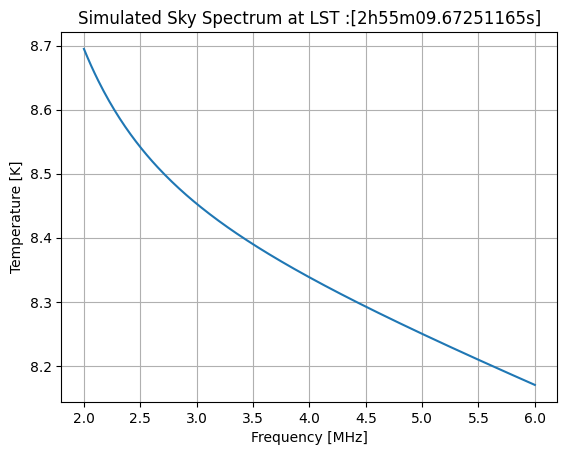

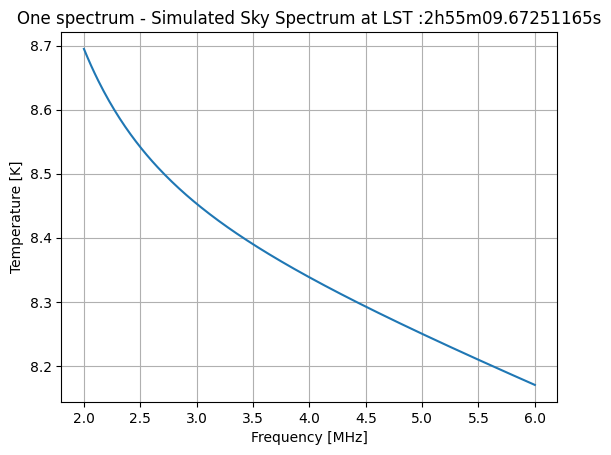

In [26]:
t = 0
while t < n_spectra:
    i = 0
    while i < 12288:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(32, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map1 = combined_array[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = beam_def(frequencies[j], new_alt, longitudes)
            if cwt > 0:  # Adding all the three intensities
                map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                Power = (map_1 * cwt + CMB_Int[j]) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 5000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s' % lst[0])
plt.grid()
plt.show()

In [28]:
def mixing_matrix2(frequencies, alt, az, timee):
    sin_theta = (np.sin(alt*np.pi/180))**2 #assuming alt is in degrees

    matrix = np.array([[sin_theta * 0.3, sin_theta * 0.16],
                       [sin_theta * 0.14, sin_theta * 0.4]], dtype=complex)
    
    half_wave_plate = np.array([[1, 0],
                                [0, 1j]], dtype=complex)

    T = 60 #in seconds, and defining "time" is seconds too

    rotation_matrix = np.array([[np.cos((2 * np.pi/T) * timee), -1 * np.sin((2 * np.pi/T) * timee)],
                                [np.sin((2 * np.pi/T) * timee), np.cos((2 * np.pi/T) * timee)]], dtype=complex)
    
    rotation_matrix_transpose = np.transpose(rotation_matrix)
    
    matrix1 = np.dot(rotation_matrix_transpose,matrix)
    matrix2 = np.dot(half_wave_plate, matrix1)
    matrix3 = np.dot(rotation_matrix, matrix2)

    conjugate_matrix = np.conjugate(matrix3)
    
    kronecker_product = np.kron(matrix3, conjugate_matrix)

    S_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 0.5, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

    result = np.dot(kronecker_product, S_matrix)

    return result

Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


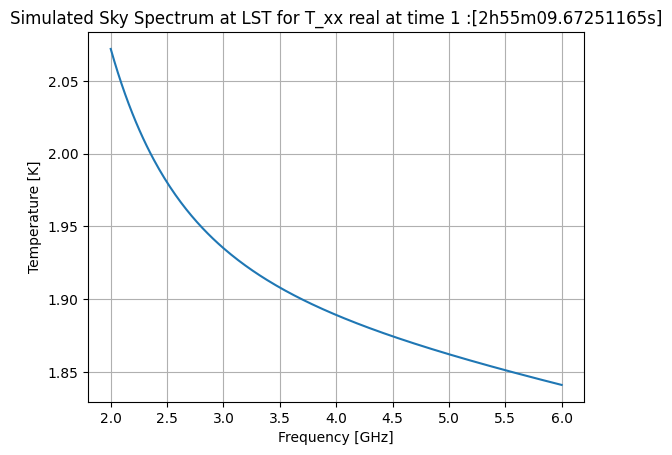

h = 0 is completed


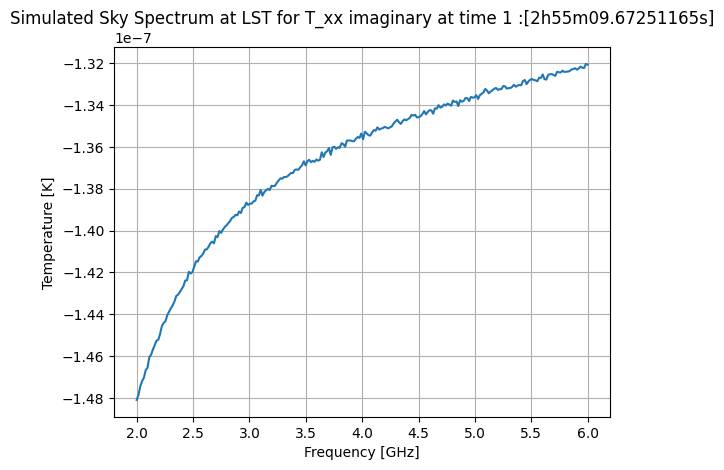

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


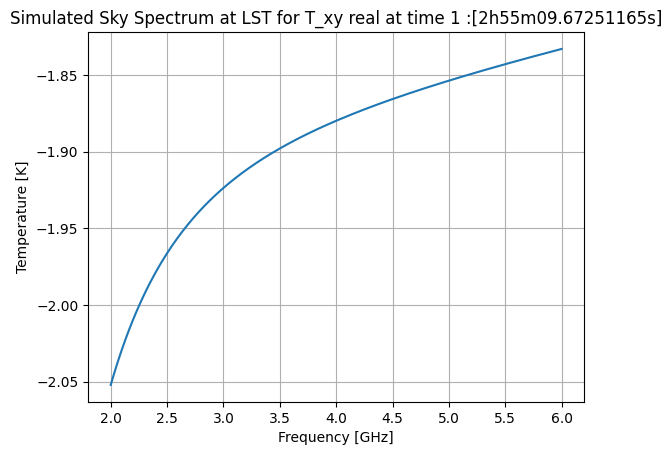

h = 1 is completed


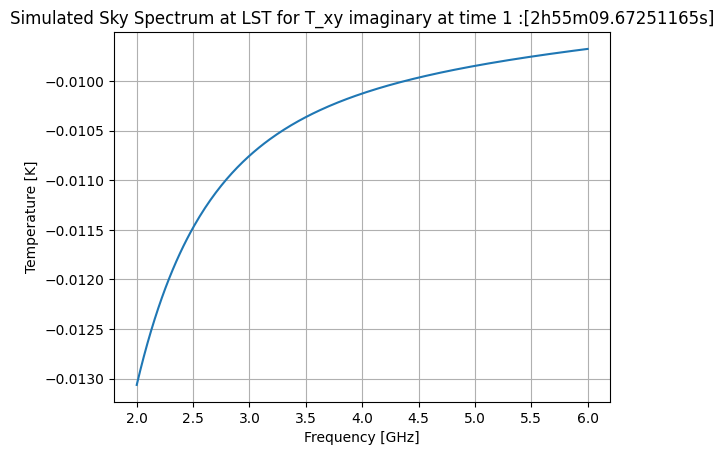

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


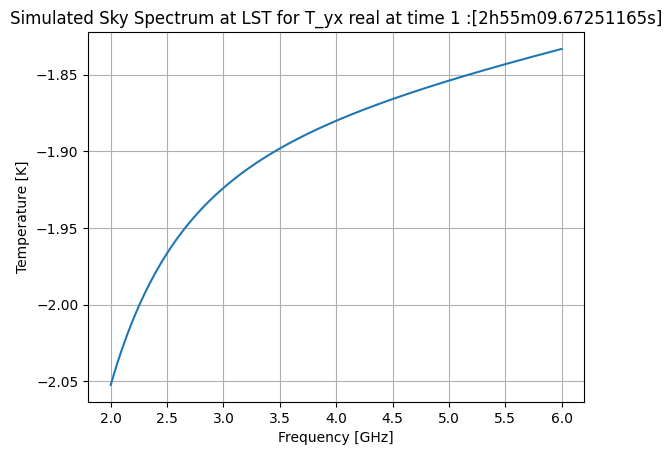

h = 2 is completed


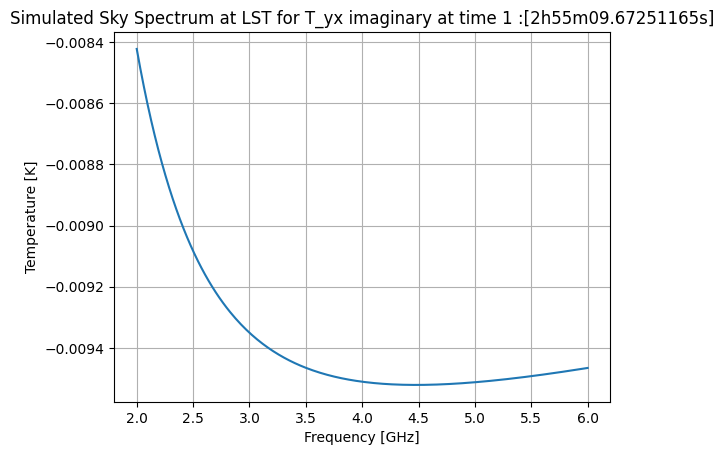

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


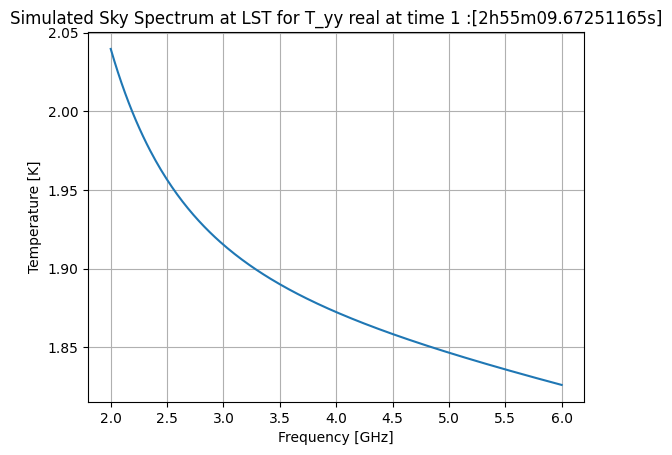

h = 3 is completed


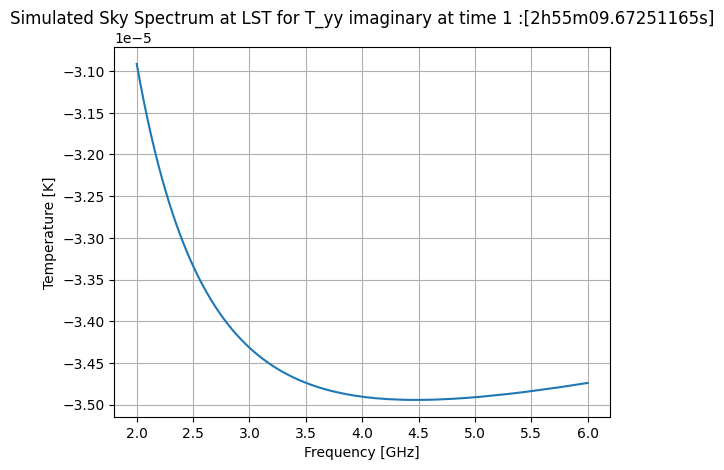

h = 3 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


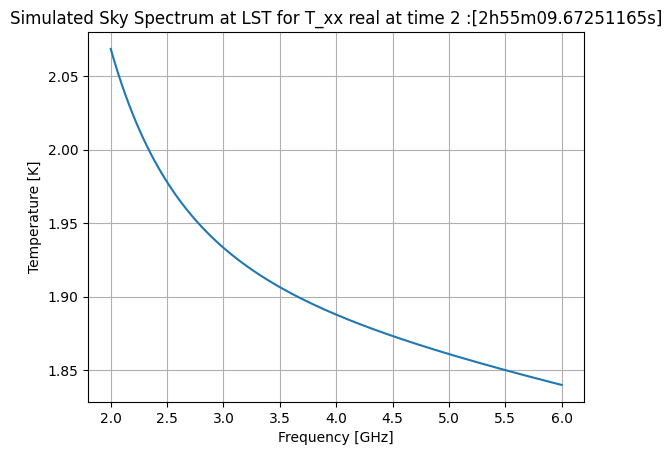

h = 0 is completed


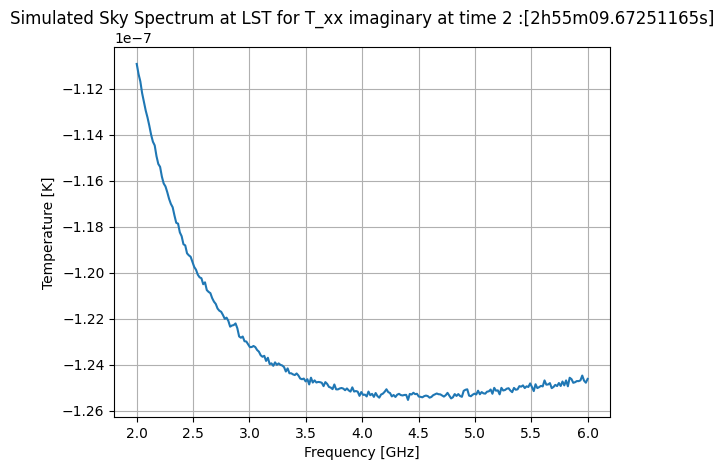

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


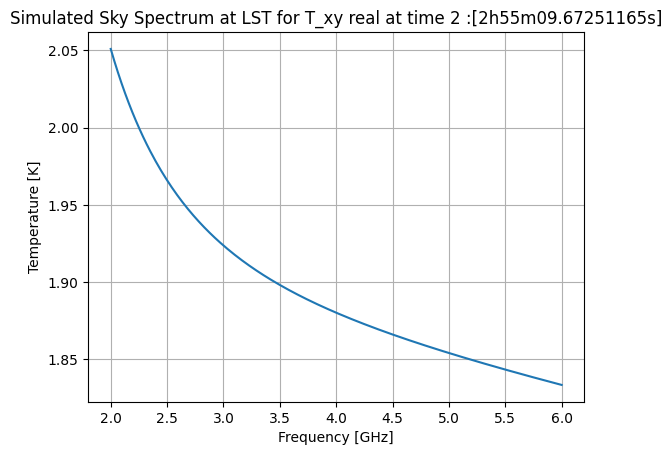

h = 1 is completed


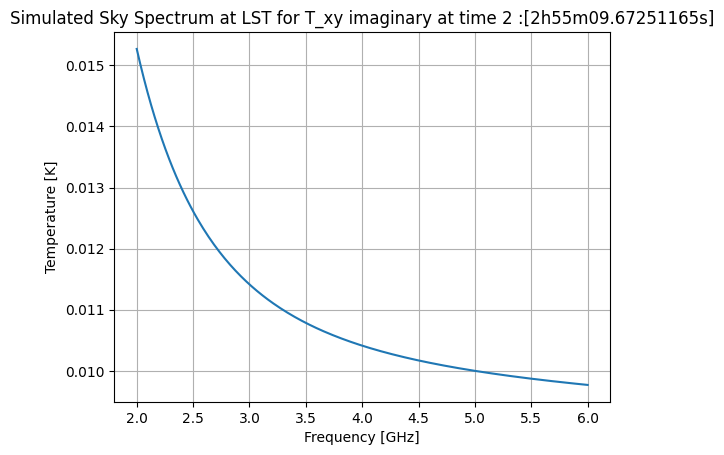

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


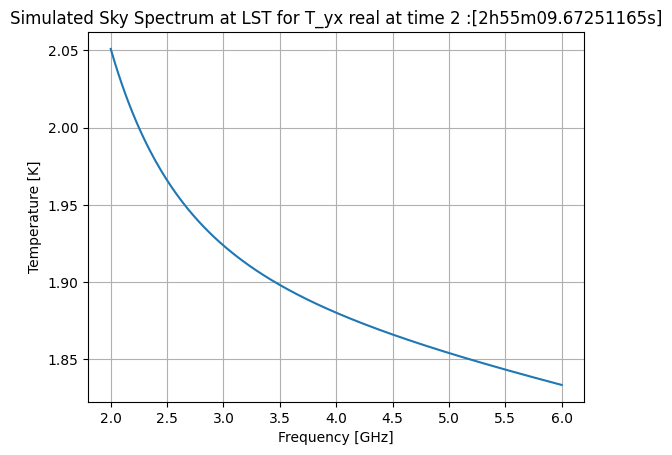

h = 2 is completed


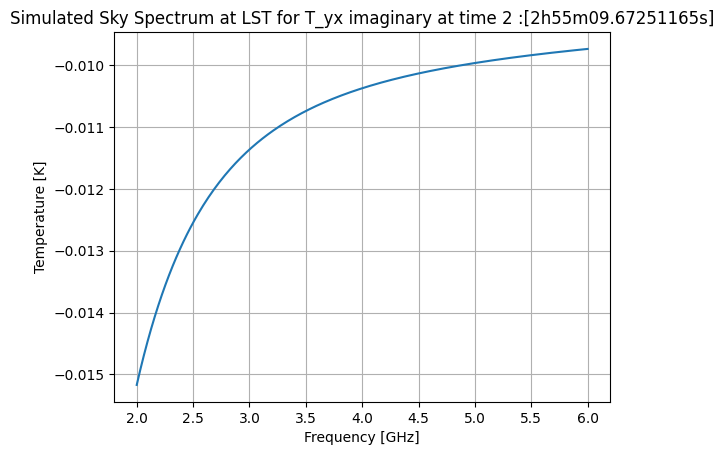

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


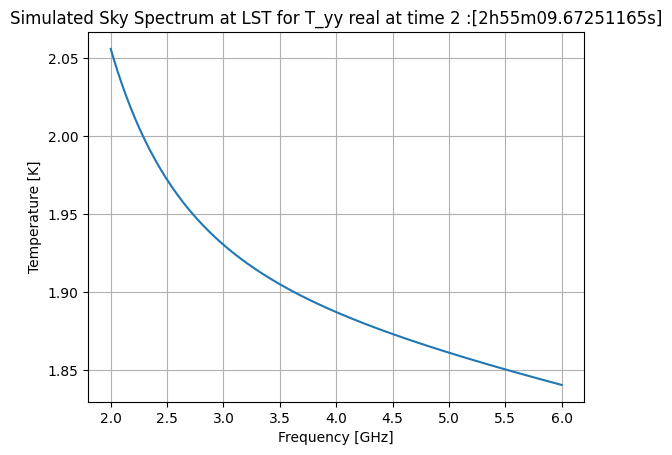

h = 3 is completed


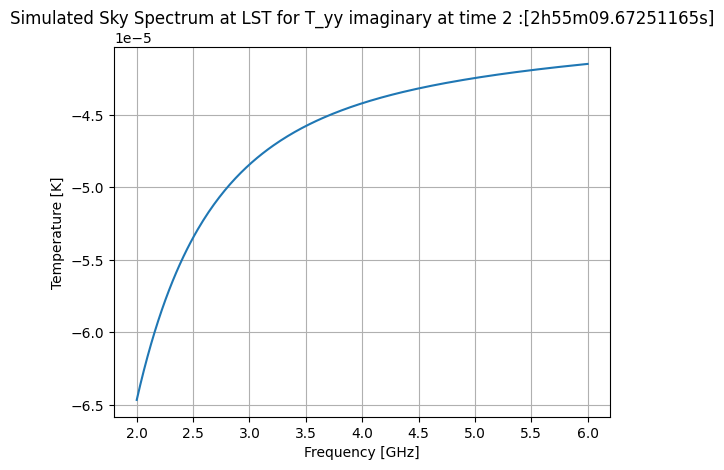

h = 3 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


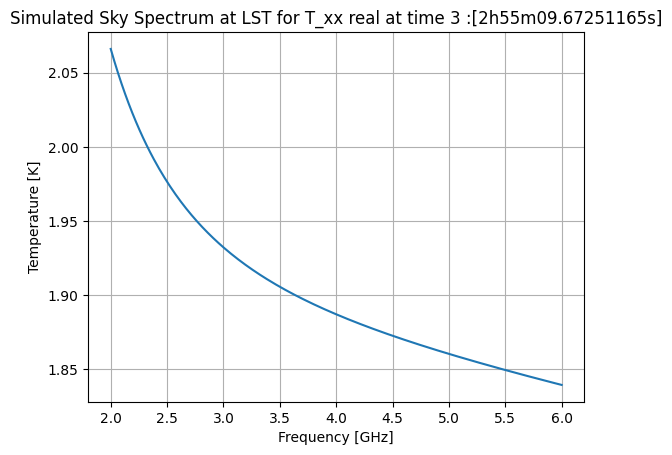

h = 0 is completed


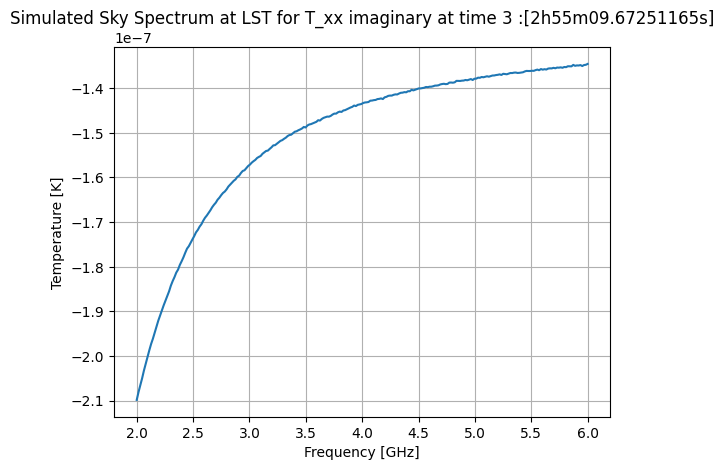

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


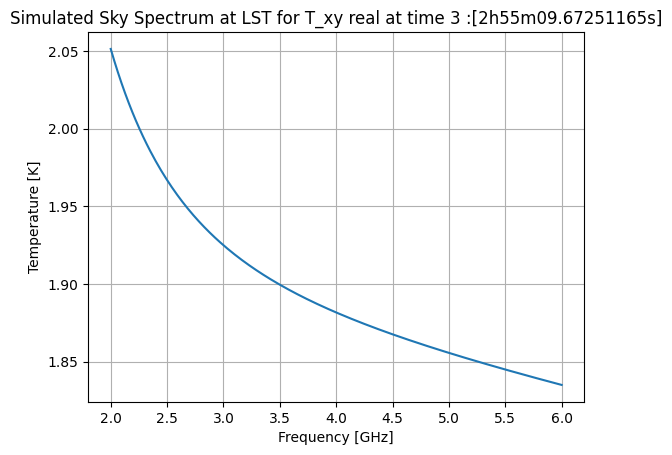

h = 1 is completed


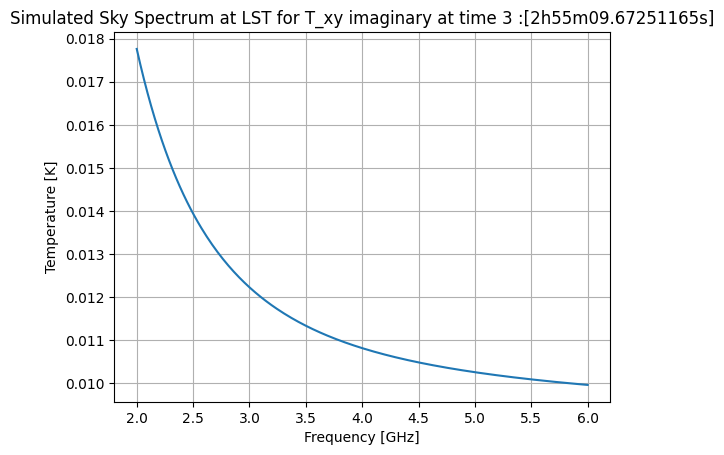

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


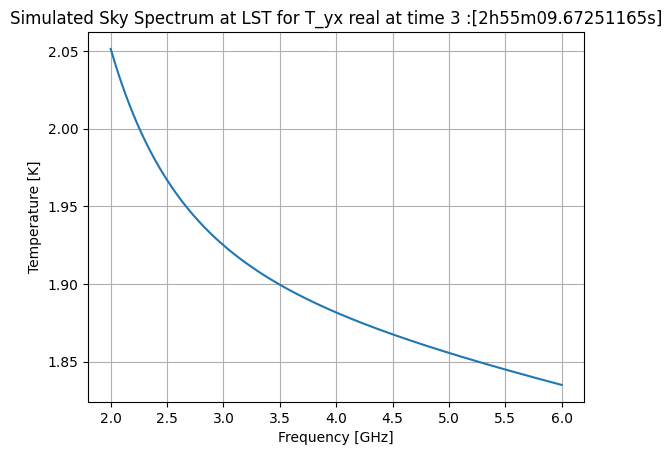

h = 2 is completed


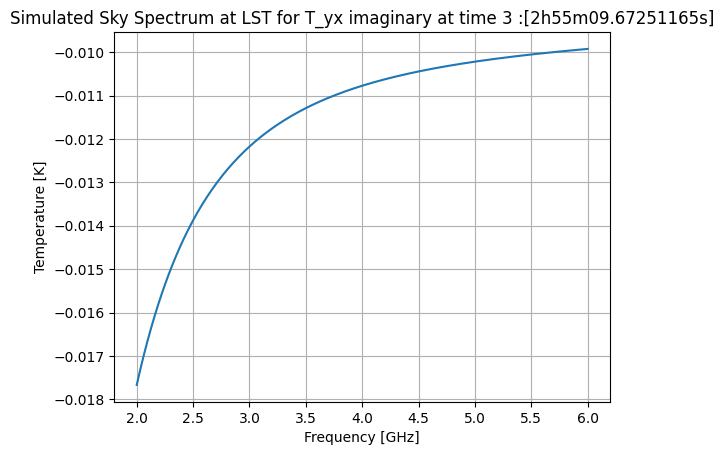

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


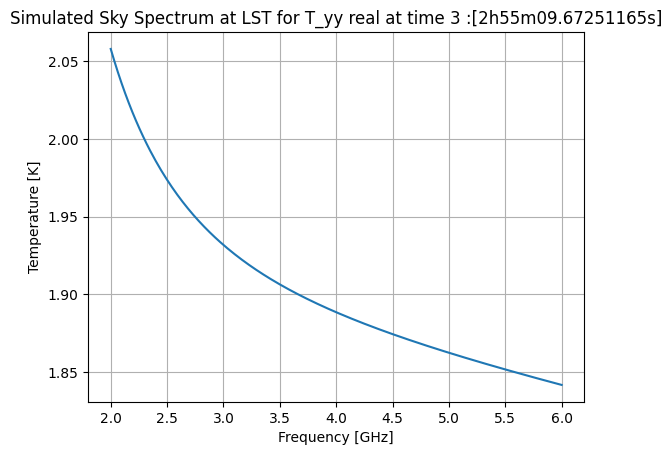

h = 3 is completed


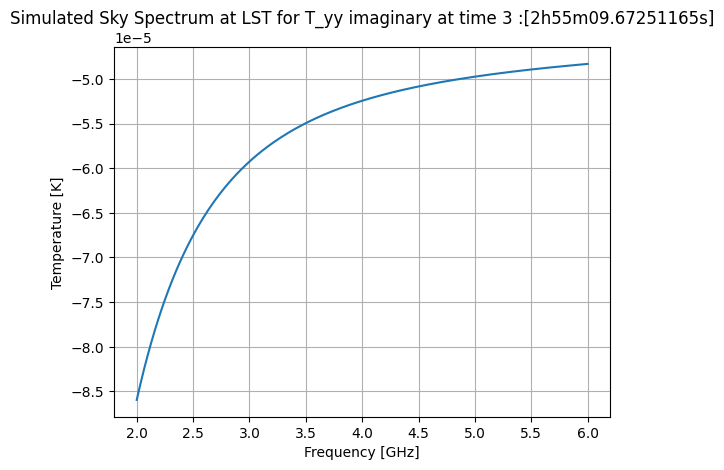

h = 3 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


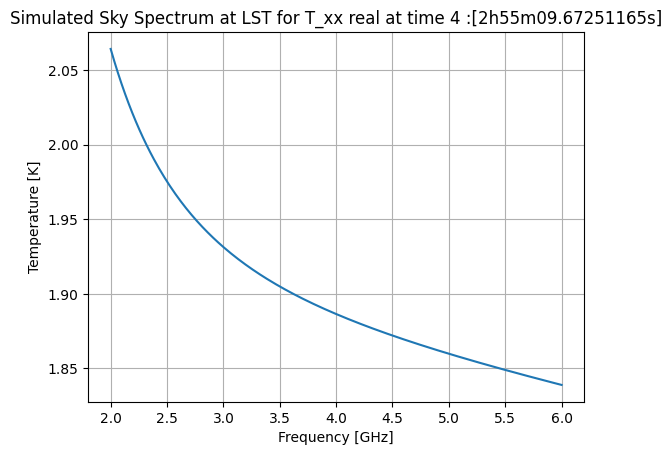

h = 0 is completed


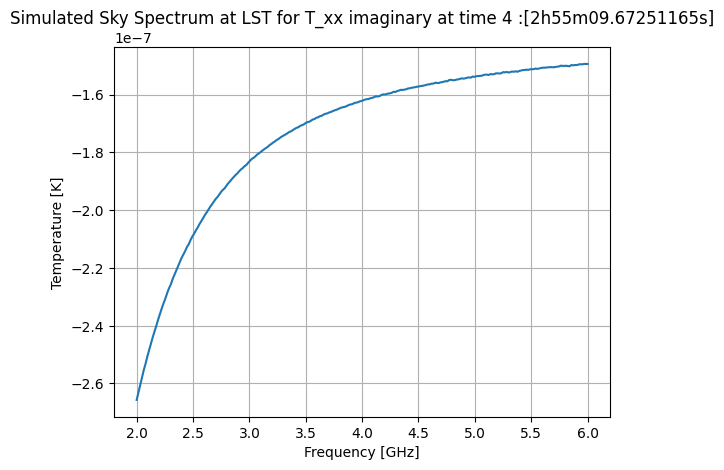

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


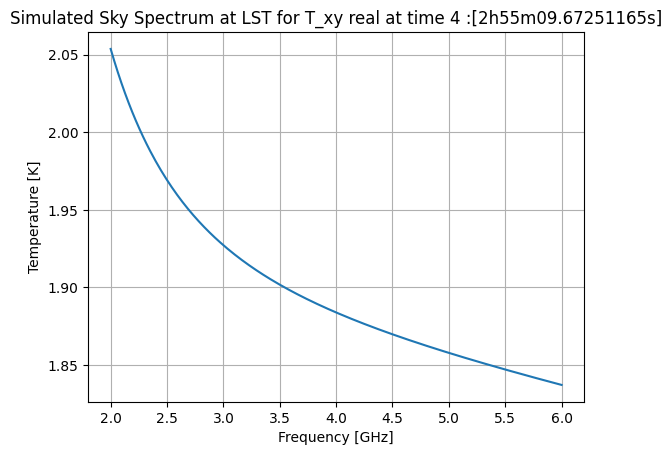

h = 1 is completed


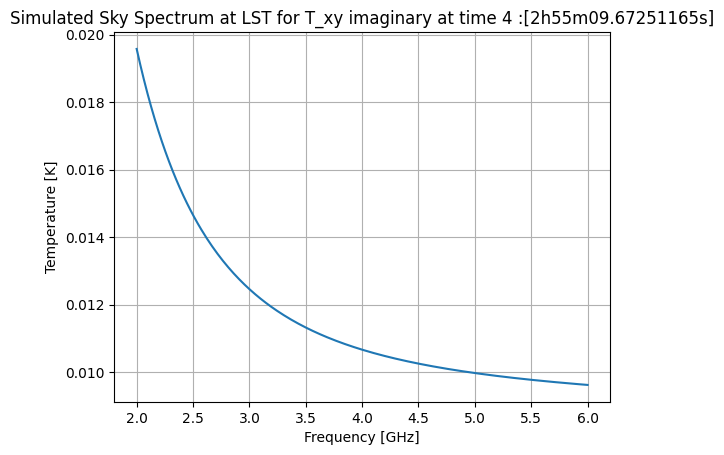

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


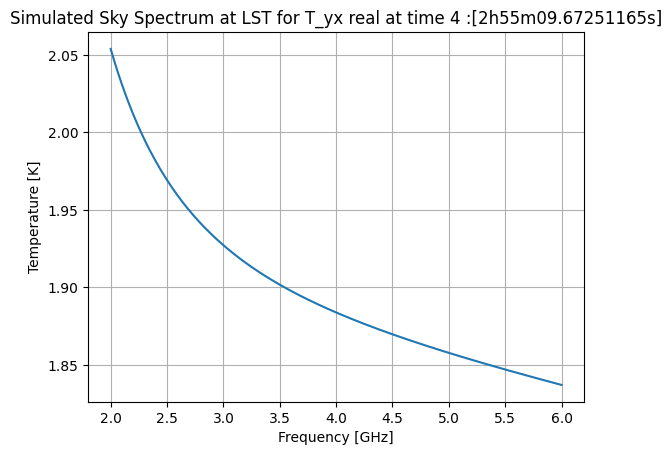

h = 2 is completed


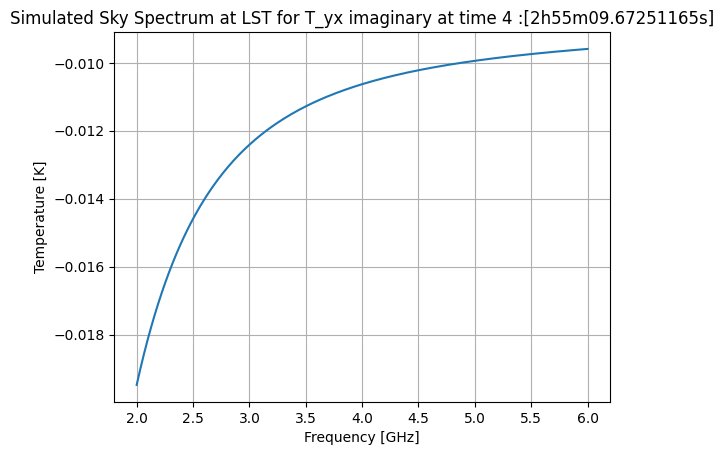

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1


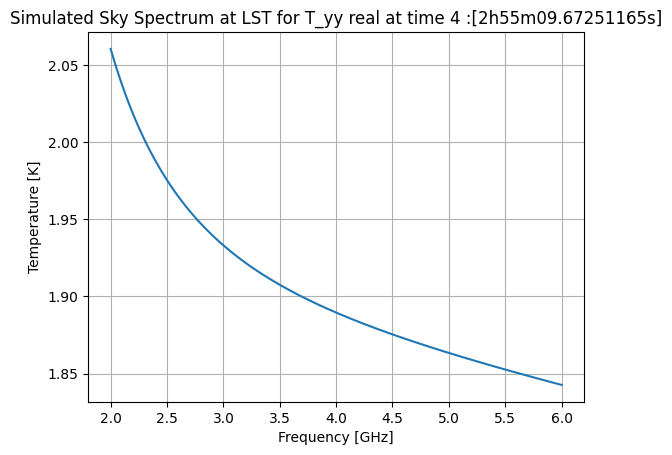

h = 3 is completed


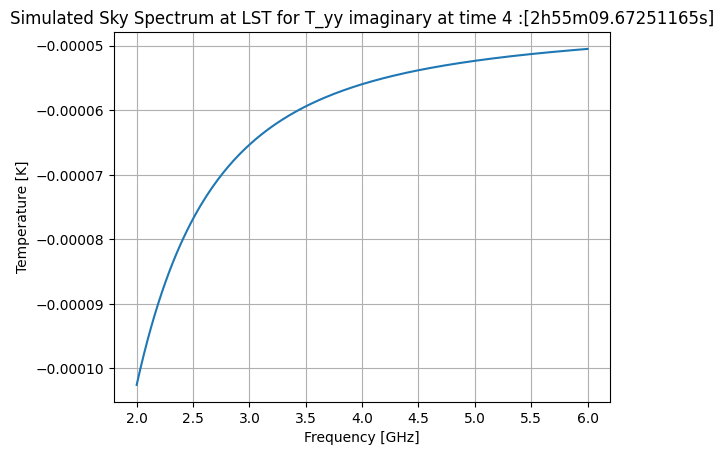

h = 3 is completed


In [90]:
output_dir = '/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1'
os.makedirs(output_dir, exist_ok=True)

titles = ["T_xx", "T_xy", "T_yx", "T_yy"]
timee = [ 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

for tim in timee:

    for h in range(4):

        t = 0
        while t < n_spectra:
            i = 0
            while i < 12288:  # Working on each pixel
                coords = hp.pixelfunc.pix2ang(32, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
                gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

                # Now, the coordinates in Galactic frame are changed to equatorial frame below
                equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
                alt = equi.alt.value
                new_alt = refraction(alt, altitude)

        

                # Using power law relation to fit spectra of three frequency maps
                #def func(xx, a):
                    #return sky_408[i - 1] * np.power((xx / 0.408), a)

                #xx = np.array([0.408, 1.420, 23])
                #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

                #popt, pcov = curve_fit(func, xx, yy)
                #a_param = popt[0]

                j = 0
                longitudes = equi.az.value
                while j < 252:
                    new_map = combined_array[:,j]
                    new_map1 = combined_array1[:,j]
                    new_map2 = combined_array2[:,j]
                    if longitudes > 359.00:
                        longitudes = 359.00
                    result = mixing_matrix2(frequencies[j], new_alt, None, tim)
                    cwt = np.sqrt((result[h,0]**2) + (result[h,1]**2) + (result[h,2]**2) + (result[h,3]**2))

                    if cwt > 0:  # Adding all the three intensities
                        map_0 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map[i - 1]) / (c ** 2)
                        map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                        map_2 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map2[i - 1]) / (c ** 2)
                        Power = (( ((map_0 + CMB_Int[j] + recomb_li.iloc[j,1]) * result[h,0]) + (map_1 * result[h,1]) + (map_2 * result[h,2]) + (0 * result[h,3]) ) ) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                        final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                        cross_mix[j] = cross_mix[j] + 1 * final_temp
                        sumwt[j] = sumwt[j] + cwt
                    j = j + 1

                if i % 5000 == 0:
                    print('Number of pixels got: ', i)

                i = i + 1

            i = 0
            while i < No_of_Channels:
                if sumwt[i] > 0:
                    cross_mix[i] = cross_mix[i] / sumwt[i]  # normalization with respect to the beam pattern
                i = i + 1

            cross_mix = np.array(cross_mix)
            cross_real = cross_mix.real
            cross_imag = cross_mix.imag
        
            sigma_real = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation
            sigma_imag = (np.array(cross_imag) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)

            # Generating an array of random integers with mean 0 and std 1.
            array = np.random.normal(0, 1, No_of_Channels)

            # Adding the gaussian error
            cross_real = cross_real + array * sigma_real
            cross_imag = cross_imag + array * sigma_imag

            output_file_real = os.path.join(output_dir, f"spectrum_CRR_real{titles[h]}_{tim}.txt")
            with open(output_file_real, "w") as file:
                for freq, temp in zip(frequencies, cross_real):
                    file.write(f"{freq}\t{temp}\n")

            output_file_imag = os.path.join(output_dir, f"spectrum_CRR_imag{titles[h]}_{tim}.txt")
            with open(output_file_imag, "w") as file:
                for freq, temp in zip(frequencies, cross_imag):
                    file.write(f"{freq}\t{temp}\n")

            spectra_real[t] = cross_real
            spectra_imag[t] = cross_imag

            cross_real = [0] * No_of_Channels
            cross_imag = [0] * No_of_Channels
            sumwt = [0] * No_of_Channels
            sigma = [0] * No_of_Channels
    
            print("No. of spectra got = ", t + 1)

            t = t + 1

        Obs = ephem.Observer()
        t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
        lst = t.sidereal_time('apparent')

        i = 0
        while i < n_spectra:
            plt.plot(frequencies, spectra_real[i])
            i = i + 1

        plt.xlabel('Frequency [GHz]')
        plt.ylabel('Temperature [K]')
        plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} real at time {tim} :%s" % lst)
        plt.grid()
        plt.show()

        print(f"h = {h} is completed")

        #plt.plot(frequencies, spectra_real[0])
        #plt.xlabel('Frequency [GHz]')
        #plt.ylabel('Temperature [K]')
        #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy real :%s' % lst[0])
        #plt.grid()
        #plt.show()

        i = 0
        while i < n_spectra:
            plt.plot(frequencies, spectra_imag[i])
            i = i + 1

        plt.xlabel('Frequency [GHz]')
        plt.ylabel('Temperature [K]')
        plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} imaginary at time {tim} :%s" % lst)
        plt.grid()
        plt.show()

        print(f"h = {h} is completed")

        #plt.plot(frequencies, spectra_imag[0])
        #plt.xlabel('Frequency [GHz]')
        #plt.ylabel('Temperature [K]')
        #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy imaginary :%s' % lst[0])
        #plt.grid()
        #plt.show()

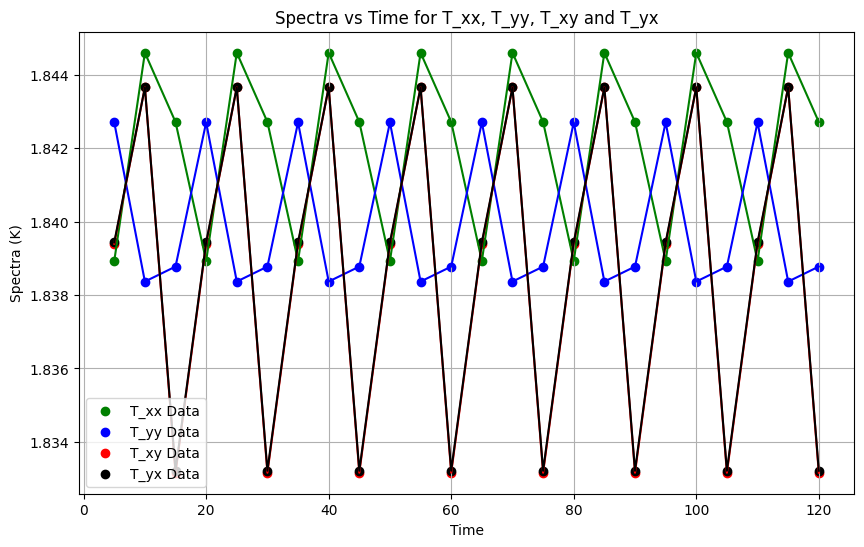

In [96]:
import numpy as np
import matplotlib.pyplot as plt

times = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

file_paths_xx = [f'/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xx_{tim}.txt' for tim in times]
file_paths_yy = [f'/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_yy_{tim}.txt' for tim in times]
file_paths_xy = [f'/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xy_{tim}.txt' for tim in times]
file_paths_yx = [f'/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_yx_{tim}.txt' for tim in times]

channel11 = 251 #to set a particular channel (frequency between 2 to 6 GHz)

frequencies1_yy = []
spectra11_yy = []
frequencies1_xx = []
spectra11_xx = []
frequencies1_yx = []
spectra11_yx = []
frequencies1_xy = []
spectra11_xy = []

for file_path in file_paths_yy:
    data = np.loadtxt(file_path, dtype=complex)
    frequencies1_yy.append(data[channel11, 0].real)  
    spectra11_yy.append(data[channel11, 1].real)     

for file_path in file_paths_xx:
    data = np.loadtxt(file_path, dtype=complex)
    frequencies1_xx.append(data[channel11, 0].real)    
    spectra11_xx.append(data[channel11, 1].real)   

for file_path in file_paths_yx:
    data = np.loadtxt(file_path, dtype=complex)
    frequencies1_yx.append(data[channel11, 0].real)  
    spectra11_yx.append(data[channel11, 1].real)     

for file_path in file_paths_xy:
    data = np.loadtxt(file_path, dtype=complex)
    frequencies1_xy.append(data[channel11, 0].real)    
    spectra11_xy.append(data[channel11, 1].real) 

frequencies1_yy = np.array(frequencies1_yy)
spectra11_yy = np.array(spectra11_yy)
frequencies1_xx = np.array(frequencies1_xx)
spectra11_xx = np.array(spectra11_xx)
frequencies1_yx = np.array(frequencies1_yx)
spectra11_yx = np.array(spectra11_yx)
frequencies1_xy = np.array(frequencies1_xy)
spectra11_xy = np.array(spectra11_xy)

plt.figure(figsize=(10, 6))

plt.scatter(times, spectra11_xx, label='T_xx Data', color='green')
plt.plot(times, spectra11_xx, color='green')
plt.scatter(times, spectra11_yy, label='T_yy Data', color='blue')
plt.plot(times, spectra11_yy, color='blue') 
plt.scatter(times, spectra11_xy, label='T_xy Data', color='red')
plt.plot(times, spectra11_xy, color='red')
plt.scatter(times, spectra11_yx, label='T_yx Data', color='black')
plt.plot(times, spectra11_yx, color='black') 
  

plt.xlabel('Time')
plt.ylabel('Spectra (K)')
plt.title('Spectra vs Time for T_xx, T_yy, T_xy and T_yx')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
ok = 0
T = 60
ran = np.sin((2 * np.pi/T) * ok)
print(ran)

0.4067366430757997


###### Install Plotly (if not already installed)
!pip install plotly

import numpy as np
import plotly.graph_objects as go

# Define file paths
file_paths = [
    '/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xx_0.txt',
    '/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xx_15.txt',
    '/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xx_30.txt',
    '/Users/hshishir/Desktop/polarization_maps/rotating_halfwave1/spectrum_CRR_realT_xx_45.txt'
]

# Corresponding time points
times = [0, 15, 30, 45]

# Initialize lists to store frequencies and spectra
all_frequencies = []
all_spectra = []
all_times = []

# Read data from each file
for file_path, time in zip(file_paths, times):
    data = np.loadtxt(file_path, dtype=complex)
    frequencies = data[:, 0].real  # Assuming the first column is frequencies
    spectra = data[:, 1].real      # Assuming the second column is the real part of the spectra
    
    all_frequencies.append(frequencies)
    all_spectra.append(spectra)
    all_times.append([time] * len(frequencies))

# Convert lists to numpy arrays for plotting
all_frequencies = np.array(all_frequencies).flatten()
all_spectra = np.array(all_spectra).flatten()
all_times = np.array(all_times).flatten()

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=all_frequencies,
    y=all_times,
    z=all_spectra,
    mode='markers',
    marker=dict(
        size=5,
        color=all_times,  # Set color to the time dimension for better visualization
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Set plot titles and labels
fig.update_layout(
    title='3D Interactive Plot of Spectra',
    scene=dict(
        xaxis_title='Frequency (GHz)',
        yaxis_title='Time (s)',
        zaxis_title='Spectra (K)'
    )
)

# Show the plot
fig.show()
